In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


## <u> <p style="text-indent:30px; text-align:center;">**Household Electric Power Consumption Forecasting**</p></u>
<p style="text-indent:30px;"> The real energy demand made on the present electrical supply is referred to as electric energy consumption. However, poor management of its use can result in a reduction in electrical supply. As a result, it is critical that everyone be concerned about energy efficiency in order to reduce consumption. The goals of this study are to develop a model for <strong>forecasting household electricity usage</strong> and to determine the best forecasting period, which could be daily, weekly, monthly, or quarterly. Individual household electricity power usage is the time-series data in our investigation.This Notebook use Deep Learning and time-series data analysis methods for this aim.<br></p>
<p style="text-indent:30px;">Any household requires electricity to function. In this period of global instability, the globe requires rising amounts of energy to maintain economic and social progress and improve living standards. Mishandling of electric energy could result in future excessive costs. Over 60% of residential energy in the United States is wasted. Many people who use power on a regular basis are unaware of how much energy is wasted. The monthly electricity usage is predicted using a forecasting tool.In this notebook series I want to use <strong>Prophet – Facebook, ARIMA (Autoregressive Integrated Moving Average), XGBoost/LightGBM, LSTM (Long Short Term Memory), DeepAR (Amazon time series model),TimeGPT (TimeGPT is a production-ready, generative, pre-trained transformer-GPT model developed by Nixtla for time series data), which is quite efficient for time series examples like ours.

#### ***About Dataset And Features:***<br>
The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years from December 2006 to November 2010. The observations were collected every minute.Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.This archive contains    2.075.259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).<br>

***<u>Data Set Characteristics:</u>***<br><br>
Multivariate, Time-Series<br>

This archive contains 2.075.259 measurements gathered between December 2006 and November 2010 (47 months).<br><br>
##### ***Notes:***<br>
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.<br>

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.<br><br>

##### ***<u>Features:</u>*** <br>
***1.date:*** Date in format dd/mm/yyyy

***2.time:*** time in format hh:mm:ss

***3.global_active_power:*** household global minute-averaged active power (in kilowatt), It is the power that is actually consumed by an appliance averaged per minute

***4.global_reactive_power:*** household global minute-averaged reactive power (in kilowatt), It is the Imaginary power that is not consumed by an appliance averaged per minute.

***5.voltage:*** minute-averaged voltage (in volt)

***6.global_intensity:*** household global minute-averaged current intensity (in ampere)

***7.sub_metering_1:*** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

***8.sub_metering_2:*** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

***9.sub_metering_3:*** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## **1.Import Libraries:**

In [2]:
# Let`s import all packages that we may need:

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## ***2.Reading Data***

In [3]:
df = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt',sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

# 1) Note that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same.<br>
# 2) I merged two columns 'Date' and 'Time' to 'dt'. <br>
# 3) I also converted in the above, the data to time-series type, by taking index to be the time.<br> 

In [4]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [6]:
df.tail()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2010-11-26 20:58:00                0.946                    0.0   240.43   
2010-11-26 20:59:00                0.944                    0.0   240.00   
2010-11-26 21:00:00                0.938                    0.0   239.82   
2010-11-26 21:01:00                0.934                    0.0   239.70   
2010-11-26 21:02:00                0.932                    0.0   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
dt                                   
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0

In [20]:
df.sample(5)

global_active_power  global_reactive_power  voltage  \
dt                                                                         
2008-07-01 21:50:00                2.456                  0.368   237.27   
2007-02-03 07:35:00                2.380                  0.000   241.43   
2009-04-03 02:21:00                0.350                  0.050   243.21   
2008-04-04 19:05:00                0.210                  0.000   238.31   
2009-07-08 05:52:00                0.660                  0.270   242.14   

                     global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                      
2008-07-01 21:50:00              10.4             1.0             0.0   
2007-02-03 07:35:00               9.8             0.0             0.0   
2009-04-03 02:21:00               1.6             0.0             0.0   
2008-04-04 19:05:00               0.8             0.0             0.0   
2009-07-08 05:52:00               3.2             0.0             1.0   

                     sub_metering_3  
dt                                   
2008-07-01 21:50:00            18.0  
2007-02-03 07:35:00             0.0  
2009-04-03 02:21:00             0.0  
2008-04-04 19:05:00             0.0  
2009-07-08 05:52:00             6.0

### **Change all column names to lowercase**

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['global_active_power', 'global_reactive_power', 'voltage',
       'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3'],
      dtype='object')

In [8]:
df.info(show_counts=True) # "show_counts" is for showing the non-null counts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   global_active_power    2049280 non-null  float64
 1   global_reactive_power  2049280 non-null  float64
 2   voltage                2049280 non-null  float64
 3   global_intensity       2049280 non-null  float64
 4   sub_metering_1         2049280 non-null  float64
 5   sub_metering_2         2049280 non-null  float64
 6   sub_metering_3         2049280 non-null  float64
dtypes: float64(7)
memory usage: 126.7 MB


In [17]:
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]:,} columns")

Dataset shape: 2,075,259 rows, 7 columns


In [10]:
df.columns

Index(['global_active_power', 'global_reactive_power', 'voltage',
       'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3'],
      dtype='object')

In [18]:
pip install summarytools

Note: you may need to restart the kernel to use updated packages.


In [19]:
from summarytools import dfSummary # for summary of the data

dfSummary(df)

In [22]:
print(f'df - Number of duplicate Record: {df.duplicated().sum():,}')

df - Number of duplicate Record: 168,560


In [23]:
df.describe().T

count        mean       std      min      25%  \
global_active_power    2049280.0    1.091615  1.057294    0.076    0.308   
global_reactive_power  2049280.0    0.123714  0.112722    0.000    0.048   
voltage                2049280.0  240.839858  3.239987  223.200  238.990   
global_intensity       2049280.0    4.627759  4.444396    0.200    1.400   
sub_metering_1         2049280.0    1.121923  6.153031    0.000    0.000   
sub_metering_2         2049280.0    1.298520  5.822026    0.000    0.000   
sub_metering_3         2049280.0    6.458447  8.437154    0.000    0.000   

                           50%      75%      max  
global_active_power      0.602    1.528   11.122  
global_reactive_power    0.100    0.194    1.390  
voltage                241.010  242.890  254.150  
global_intensity         2.600    6.400   48.400  
sub_metering_1           0.000    0.000   88.000  
sub_metering_2           0.000    1.000   80.000  
sub_metering_3           1.000   17.000   31.000

#### ***Dealing with missing values  'nan' with a test statistic***

In [5]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [25]:
# checking missing data
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total     %
global_active_power    25979  1.25
global_reactive_power  25979  1.25
voltage                25979  1.25
global_intensity       25979  1.25
sub_metering_1         25979  1.25
sub_metering_2         25979  1.25
sub_metering_3         25979  1.25

In [17]:
# finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all(): #if there are any null values in the column
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [6]:
# filling nan with mean in any columns

for j in range(0,7):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [10]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

global_active_power      0
global_reactive_power    0
voltage                  0
global_intensity         0
sub_metering_1           0
sub_metering_2           0
sub_metering_3           0
dtype: int64

## ***3. Data visualization and analyzing values feature by feature***

In [28]:
df.head()

global_active_power  global_reactive_power  voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

### 3.1 dt (Dates and time)

In [21]:
df.index.min(), df.index.max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2010-11-26 21:02:00'))

### 3.2 Global_Active_Power[kw]:<br>

Household global minute-averaged active power (in kilowatt), It is the power that is actually consumed by an appliance averaged per minute<br>

Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar behaviour.<br>

In [29]:
df["global_active_power"].head()

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: global_active_power, dtype: float64

In [30]:
pd.DataFrame(df.global_active_power.describe())

global_active_power
count         2.075259e+06
mean          1.091615e+00
std           1.050655e+00
min           7.600000e-02
25%           3.100000e-01
50%           6.300000e-01
75%           1.520000e+00
max           1.112200e+01

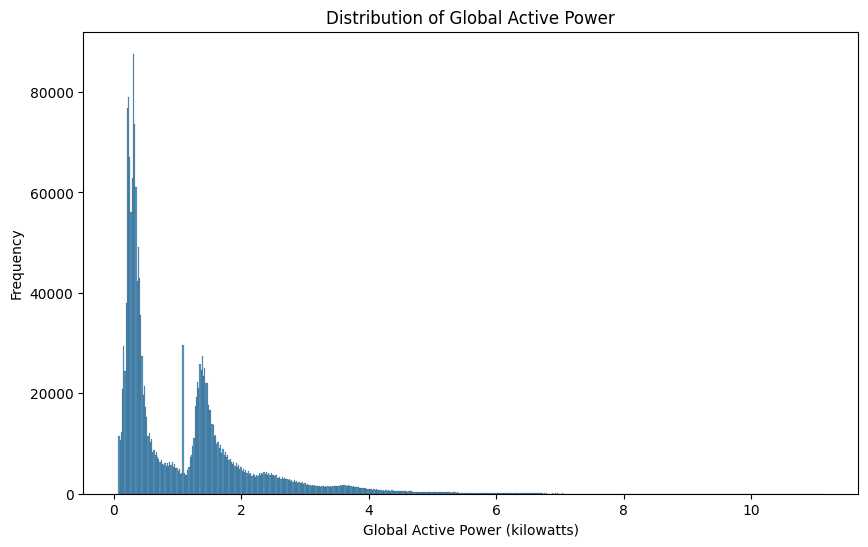

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df["global_active_power"])
plt.title("Distribution of Global Active Power")
plt.xlabel("Global Active Power (kilowatts)")
plt.ylabel("Frequency")
plt.show()

In [33]:
df1 = df.copy()

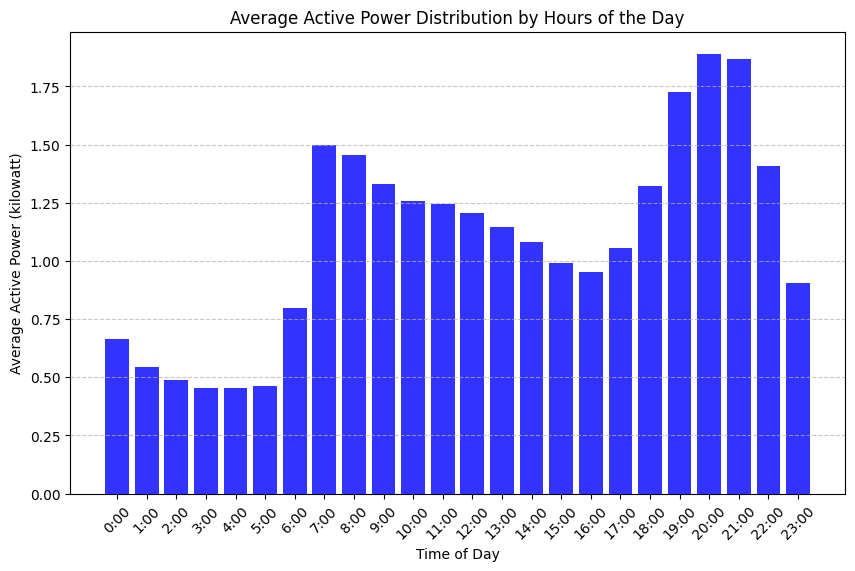

In [26]:
import matplotlib.pyplot as plt
import numpy as np


# to extract time information from datetime index
df1.loc[:, "Hour"] = df1.index.hour

# to group by hour and average
average_per_hour = df1.groupby("Hour")["global_active_power"].mean()

# to set hours for the X-axis
hours = np.arange(0, 24)

# For graph drawing
plt.figure(figsize=(10, 6))
plt.bar(hours, average_per_hour.loc[hours], color='blue', alpha=0.8)  # Bar chart

# To specify x-axis labels
plt.xticks(hours, labels=[f"{h}:00" for h in hours], rotation=45)

# For axis titles and chart title
plt.xlabel("Time of Day")
plt.ylabel("Average Active Power (kilowatt)")
plt.title("Average Active Power Distribution by Hours of the Day")

plt.grid(axis="y", linestyle="--", alpha=0.7)  # grid lines on Y the axis

plt.show()


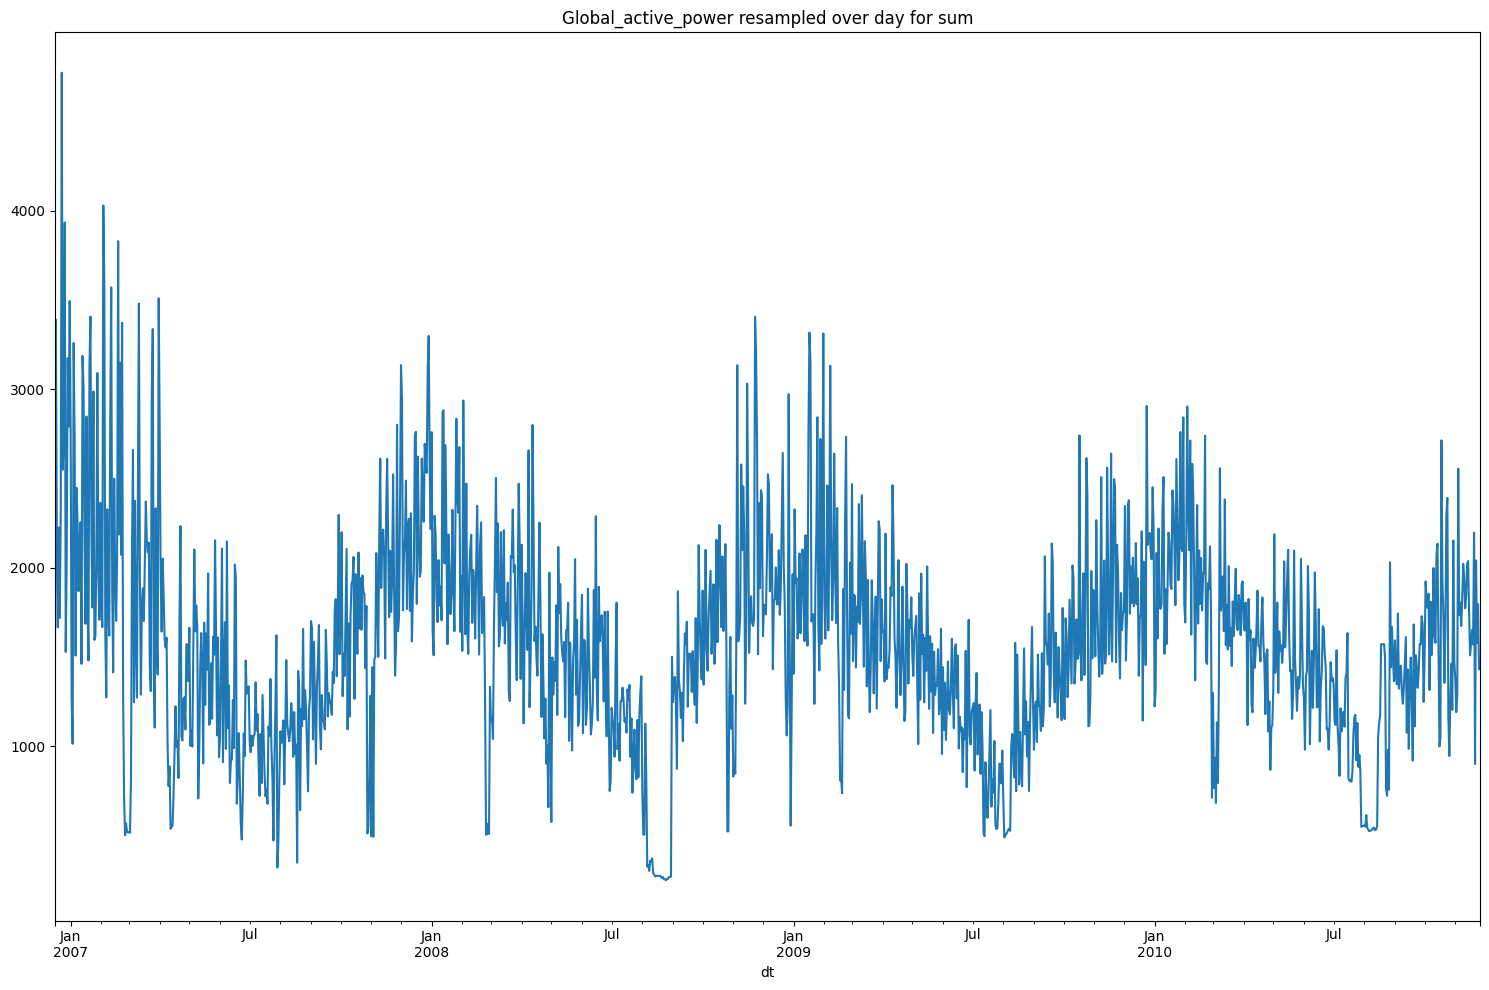

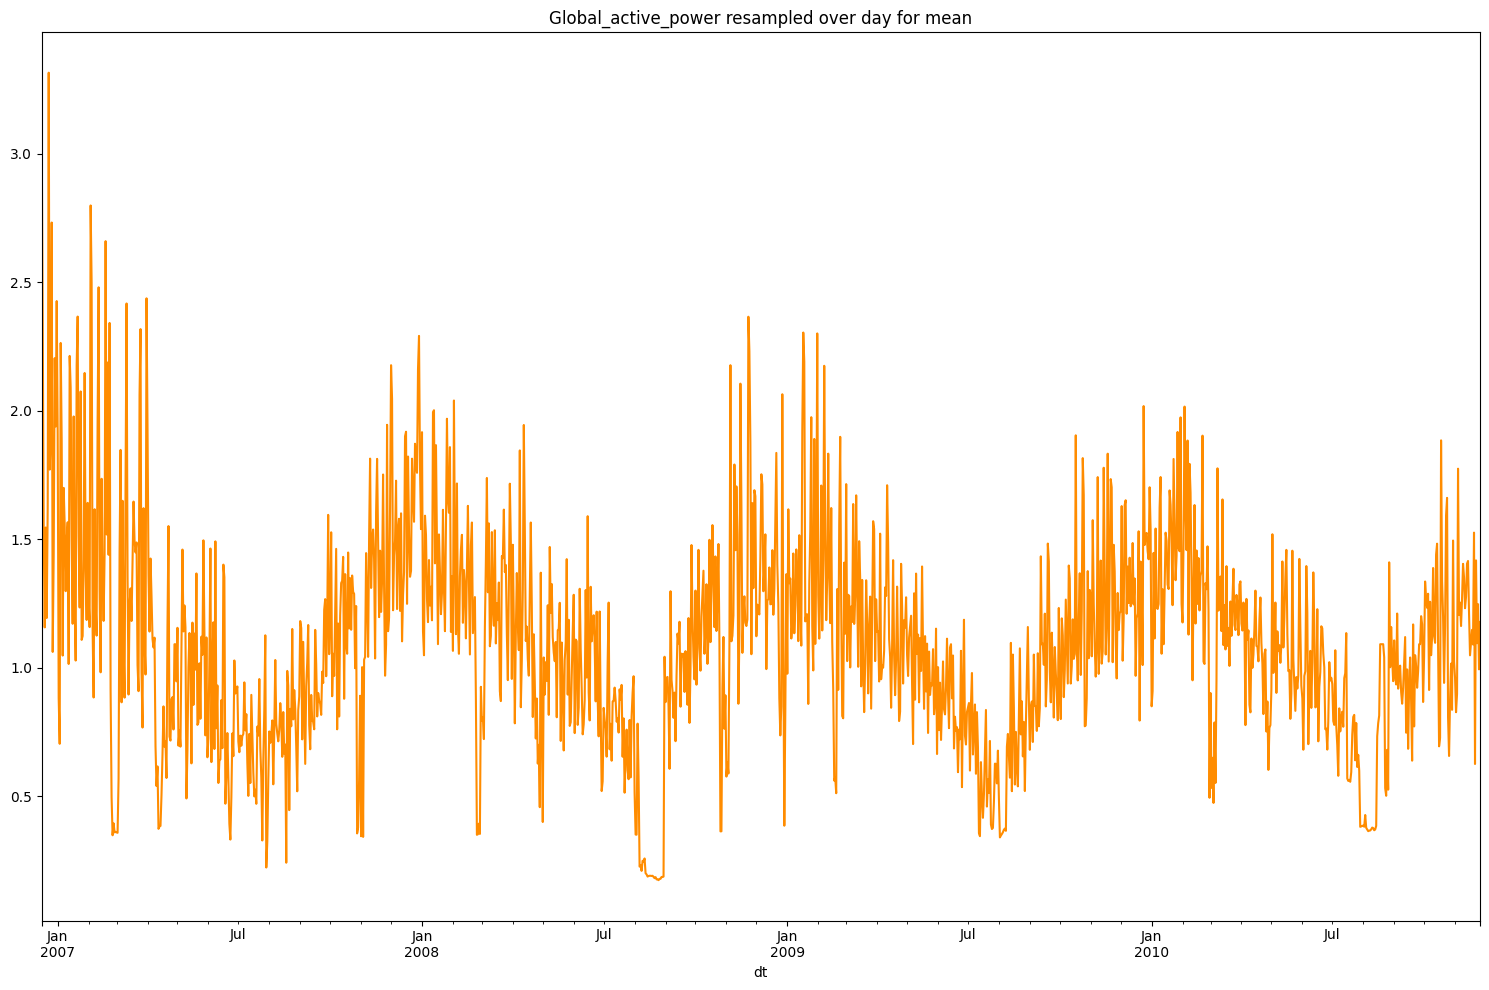

In [27]:
plt.figure(figsize=(15,10))
df.global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') # Downsampling; converting from minutely to daily data points and summing the corresponding values
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
df.global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='darkorange') # Downsampling; converting from minutely to daily data points and averaging the corresponding values
plt.tight_layout()
plt.show()

#### Above I resampled data over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled dataset, have similar behaviour.

- ***Long-term overall trend:*** The graph shows significant fluctuations over the years, but ***there is no clear upward or downward trend***.
- ***Volatile pattern:*** The series starts at a high level in early 2007 and follows a fluctuating course.
- ***Recurring annual patterns:*** The graph exhibits peaks and troughs at certain times each year, indicating a ***strong seasonal pattern***.
- ***Distinct fluctuations:*** There are noticeable increases and decreases at specific intervals each year, suggesting the presence of seasonal effects.
  Overall, the time series appears to have a fluctuating trend along with strong seasonality.<br>

  #### ***I want to extract insights by doing a more detailed analysis, I want to experiment with this data using commonly used methods (such as moving averages, detrending or seasonal decomposition)..***

### Trend Analysis with Moving Average

In [34]:
df_resampled = df1.global_active_power.resample('D').sum().to_frame()

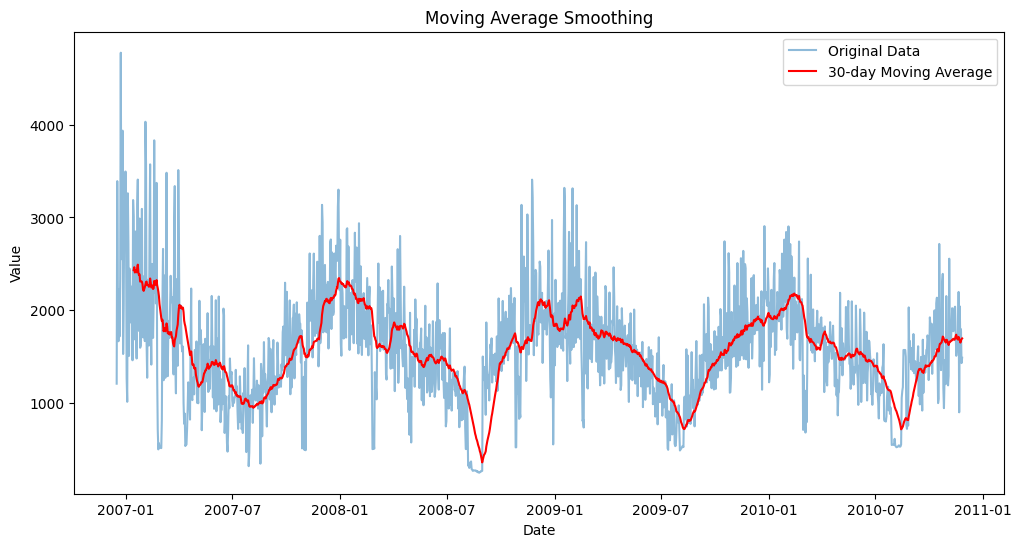

In [29]:
# 30-day moving average calculation
df_resampled['Moving_Avg'] = df_resampled.global_active_power.rolling(window=30).mean()

# Graph
plt.figure(figsize=(12,6))
plt.plot(df_resampled.global_active_power, label='Original Data', alpha=0.5)
plt.plot(df_resampled['Moving_Avg'], label='30-day Moving Average', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Moving Average Smoothing")
plt.show()

#### This graph displays daily total active power consumption (blue line) and its 30-day moving average (red line) for smoothing fluctuations.<br>

1-Trend (Long-Term Patterns)<br>

- There is a clear seasonal fluctuation over time.<br>
- Several peaks and troughs are observed from 2007 to 2010.<br>
- A significant drop is noticeable around mid-2008 and early 2009.<br>
  
2- Seasonality (Periodic Fluctuations)<br>

- The red line shows regular increases and decreases throughout the year, indicating a seasonal pattern.
- Typically, higher consumption is seen in summer and winter, while lower consumption occurs in spring and fall.<br>

3-Volatility (Short-Term Variations)<br>

- The blue line has large short-term fluctuations, meaning daily power consumption varies significantly.<br>
- However, the 30-day moving average smooths out these fluctuations, making the overall trend clearer.<br>

Energy consumption shows strong seasonal effects, along with long-term fluctuations.
The moving average helps filter out daily noise, revealing the main trend more effectively.
For deeper insights, seasonal decomposition or detrending techniques could be applied.
These findings provide valuable insights for energy management and demand forecasting

###   **Seasonal Decomposition**

***Seasonal Decomposition*** is a method used to separate the observed trends, seasonal components, and random components (noise) in time series data. This process helps make the data easier to understand and aids in ***better modeling for future predictions.***

There are three main components in time series data:

***Trend:*** Represents the overall movement of the data over the long term. For example, an increase or decrease in sales over the years.

***Seasonal Component:*** Represents a periodic pattern in the data. This can include yearly, monthly, or daily cycles (e.g., increased sales during holiday seasons).

***Residual Component:*** The random noise left after removing the trend and seasonal components. This is typically the part of the data that the model cannot explain.

Separating these components is important for accurately modeling the data and making predictions. It is also useful for detecting anomalies and optimizing business strategies that aim to monitor and leverage seasonal effects.

In [35]:
df_resampled.sample()

global_active_power
dt                             
2010-05-19             1426.752

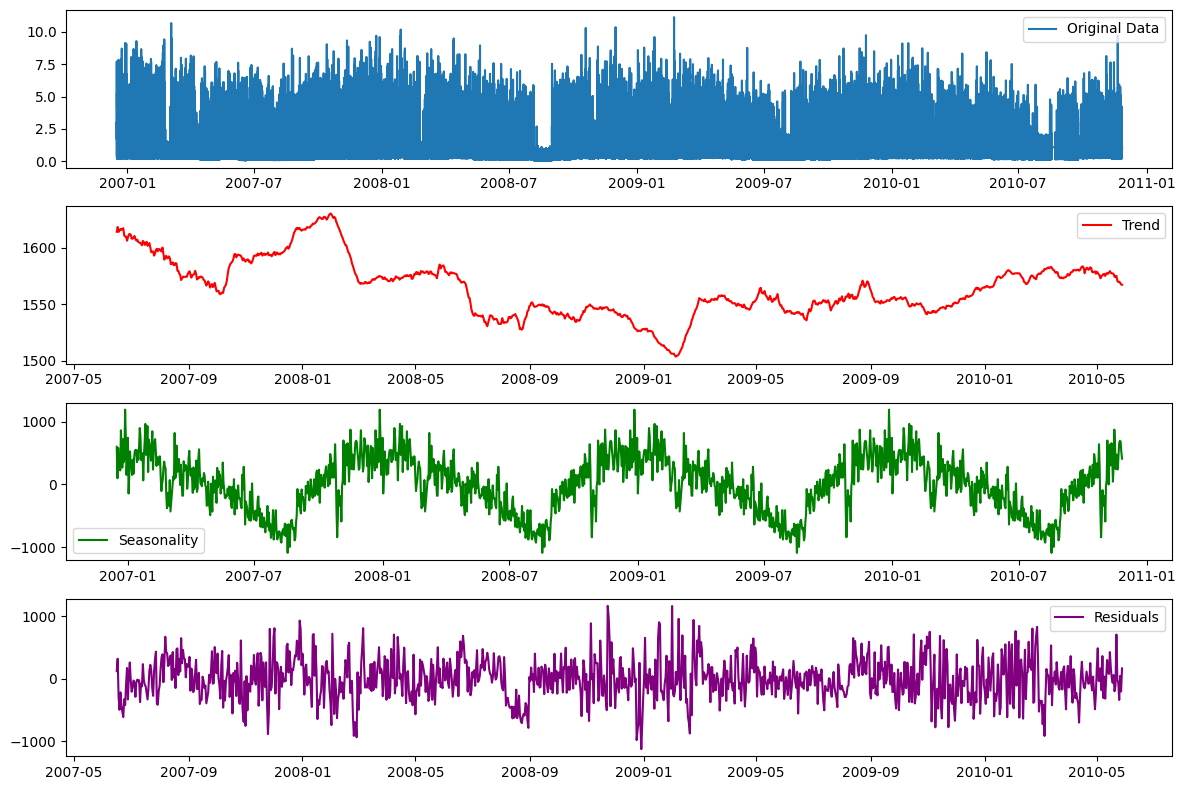

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_resampled['global_active_power'], model='additive', period=365)  # Annual seasonal period (365 days)

# Plotting the results
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df['global_active_power'], label='Original Data')
plt.legend()

plt.subplot(4,1,2)
plt.plot(result.trend, label='Trend', color='red')
plt.legend()

plt.subplot(4,1,3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(result.resid, label='Residuals', color='purple')
plt.legend()

plt.tight_layout()
plt.show()

Here's analysis of this seasonal decomposition graph:

***Original Data (Blue):***<br>
- A time series covering 2007-2010 period with high-frequency fluctuations<br>
- The data generally moves within the 0-10 range, occasionally reaching higher values<br>
- Notable volatility structure present<br>
***Trend Component (Red):***<br>
- Shows the long-term tendency of the series<br>
- An upward trend in early 2008, followed by a downward trend until early 2009<br>
- Gradual recovery and upward trend after 2009<br>
- Moves within the 1500-1600 band<br>
Seasonal Component (Green):<br>
- Demonstrates a very clear and regular seasonal pattern<br>
- Shows recurring fluctuations during similar periods each year and repeats in approximately 6-12 month periods<br>
- The magnitude of seasonal effects varies between +1000 and -1000<br>
- Forms 4-5 distinct peaks and troughs within each year<br>
***Residuals (Purple):***<br>
- Shows random fluctuations<br>
- Noise component generally varying between -1000 and +1000<br>
- High volatility clusters in some periods,shows some outliers in certain periods, this shows that sudden changes are taking place.<br>
- Relatively symmetric distribution of residuals<br>
- Possible external factors:
    * Power outages
    * Major weather events (e.g. storms, extreme heat or cold waves)
    * Economic crises and price changes


This comprehensive breakdown of components helps us understand the underlying patterns in our time series data.This data provides critical information about utilities, public policies, and consumer habits. This analysis can be used to develop demand forecasts, energy conservation policies, and dynamic pricing strategies.<br>

Here are the key insights from the time series decomposition:<br><br>


- The trend component might be an economic indicator (seems to reflect the effects of 2008-2009 crisis)
- The decomposition process appears successful as components are clearly separated
- The dataset shows a strong seasonal component, indicating that seasonal factors must be considered in predictive modeling. This clear seasonality pattern suggests that any forecasting approach should incorporate these regular cyclical patterns.<br>
- The trend component shows a significant decline in 2008-2009 and then a recovery.
- This historical context is crucial for understanding long-term patterns.<br>
- The stability of the residuals indicates that the decomposition model effectively explains the data's behavior. This suggests the chosen decomposition method is appropriate for this particular time series.<br>
- The pronounced seasonal pattern reveals strong periodicity inherent in the underlying process. This likely stems from recurring factors in business processes or external influences that follow a regular cycle.<br>
- The recovery trend observed after 2009 could be interpreted as a positive signal for future period forecasts, though this should be considered alongside other contextual factors.
- SARIMA or other models containing seasonal components might be suitable for this series

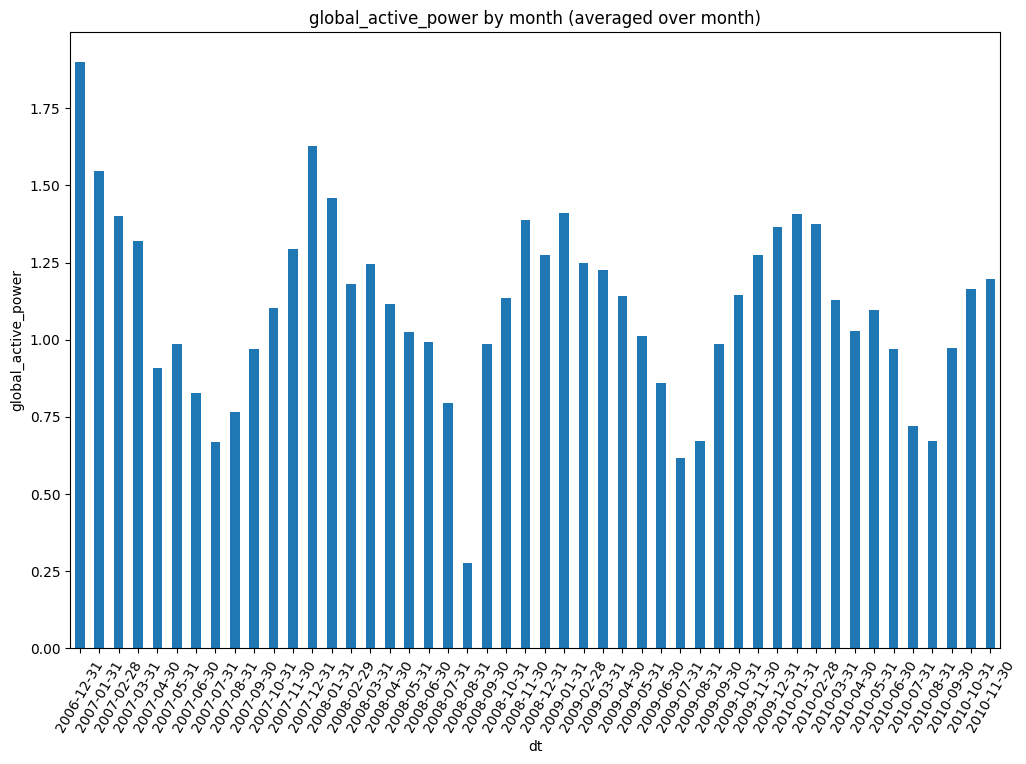

In [32]:
# Sum of 'Global_active_power' resampled over month
plt.figure(figsize=(12,8))
ax = df['global_active_power'].resample('ME').mean().plot(kind='bar')

xticks_dates = df.resample('ME').mean().index
plt.xticks(rotation=60)
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in xticks_dates], rotation=60,fontdict={"size":10})

plt.ylabel('global_active_power')
plt.title('global_active_power by month (averaged over month)')
plt.show()

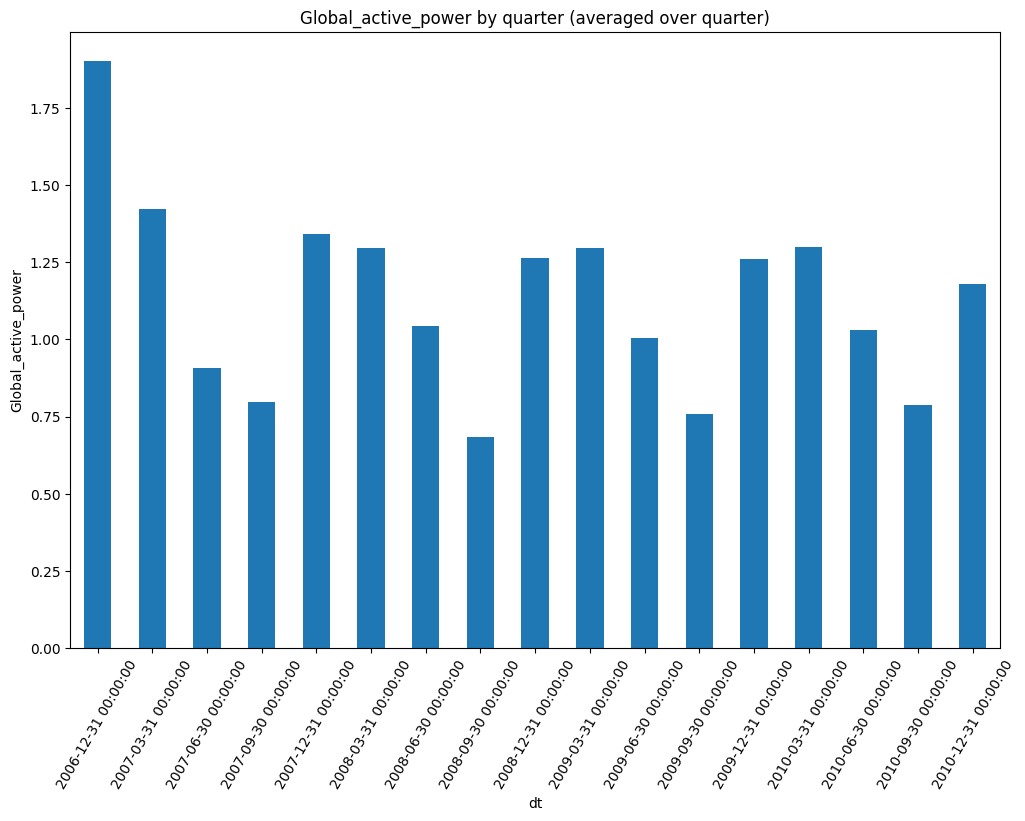

In [33]:
## Mean of 'Global_active_power' resampled over quarter
plt.figure(figsize=(12,8))
df['global_active_power'].resample('QE').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power by quarter (averaged over quarter)')
plt.show()

#### It is very important to note from above plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering.

### 3.3 Global_reactive_power[kw]:<br>

Household global minute-averaged reactive power (in kilowatt), It is the Imaginary power that is not consumed by an appliance averaged per minute.<br>

<Figure size 1400x800 with 0 Axes>

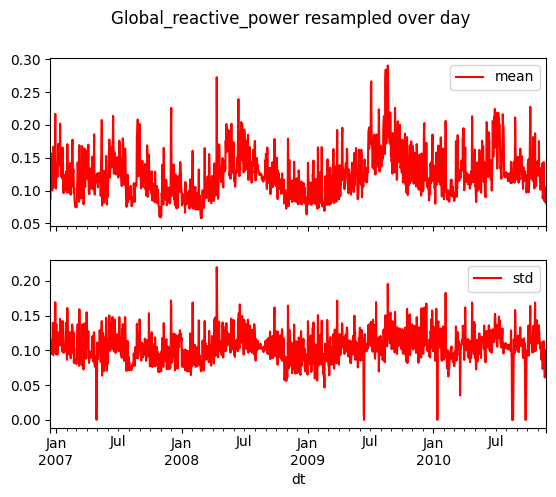

In [34]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
plt.figure(figsize=(14,8))
r2 = df.global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show();

### 3.4 Global_intensity[Ampere]:<br>

Household global minute-averaged current intensity (in ampere)

<Figure size 1400x800 with 0 Axes>

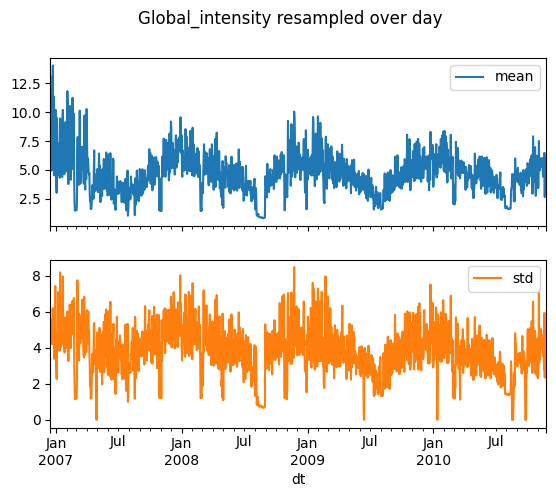

In [35]:
### Below I show mean and std of 'Global_intensity' resampled over day
plt.figure(figsize=(14,8))
x = df.global_intensity.resample('D').agg(['mean', 'std'])
x.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

### 3.5 Voltage[ V ]:<br>
minute-averaged voltage (in volt)

In [36]:
pd.DataFrame(df.voltage.describe())

voltage
count  2.075259e+06
mean   2.408399e+02
std    3.219643e+00
min    2.232000e+02
25%    2.390200e+02
50%    2.409600e+02
75%    2.428600e+02
max    2.541500e+02

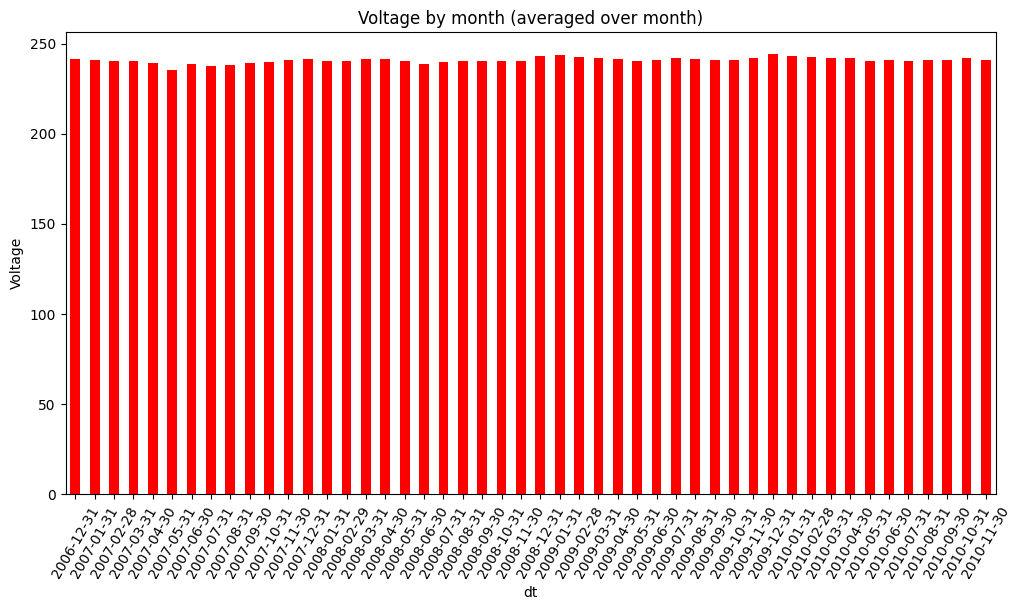

In [37]:
## mean of 'Voltage' resampled over month
plt.figure(figsize=(12,6))
ax = df['voltage'].resample('ME').mean().plot(kind='bar', color='red')
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in xticks_dates], rotation=60,fontdict={"size":10})
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage by month (averaged over month)')
plt.show()

#### It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.

### 3.6 Sub_metering_1[WH]:<br>
Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).<br>

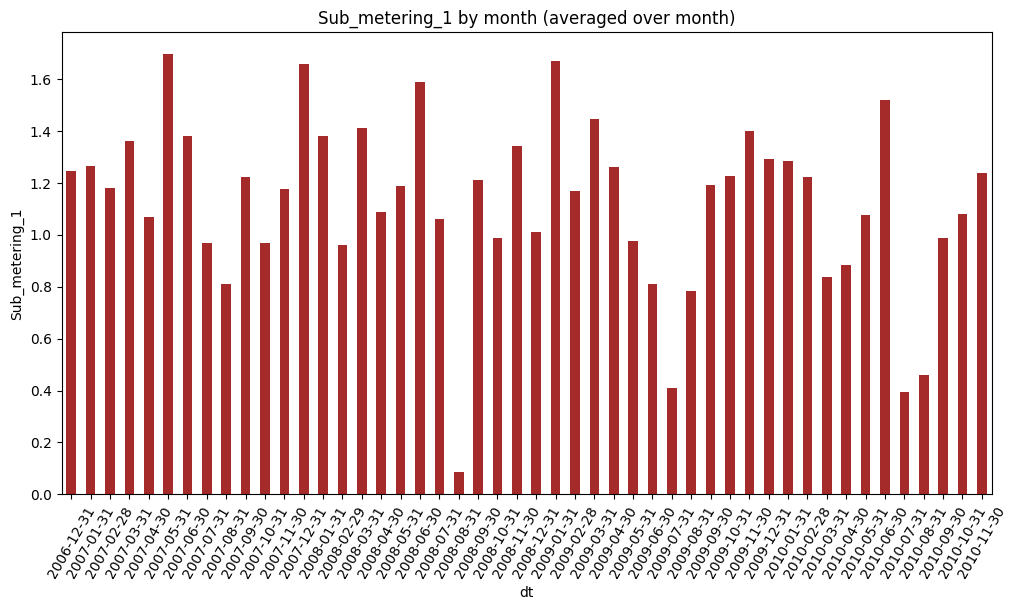

In [38]:
plt.figure(figsize=(12,6))
ax = df['sub_metering_1'].resample('ME').mean().plot(kind='bar', color='brown')
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in xticks_dates], rotation=60,fontdict={"size":10})
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 by month (averaged over month)')
plt.show()

### 3.7 Sub_metering_2[WH]:<br>
Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>

In [37]:
pd.DataFrame(df.sub_metering_2.describe())

sub_metering_2
count    2.075259e+06
mean     1.298520e+00
std      5.785470e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.000000e+01

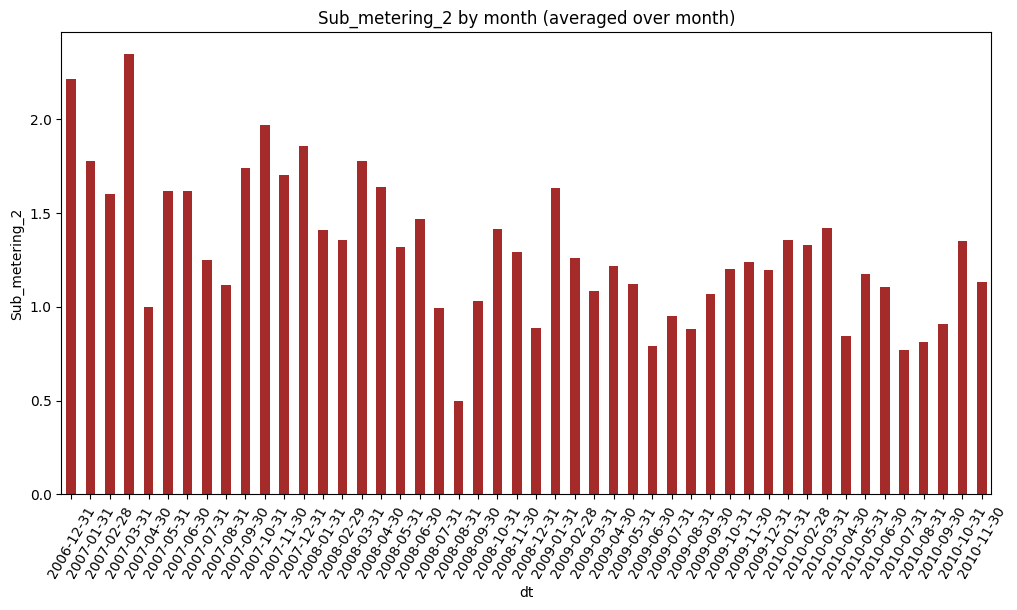

In [40]:
plt.figure(figsize=(12,6))
ax = df['sub_metering_2'].resample('ME').mean().plot(kind='bar', color='brown')
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in xticks_dates], rotation=60,fontdict={"size":10})
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 by month (averaged over month)')
plt.show()

### 3.8 Sub_metering_3[WH]:<br>

Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.<br>

In [38]:
pd.DataFrame(df.sub_metering_3.describe())

sub_metering_3
count    2.075259e+06
mean     6.458447e+00
std      8.384178e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01

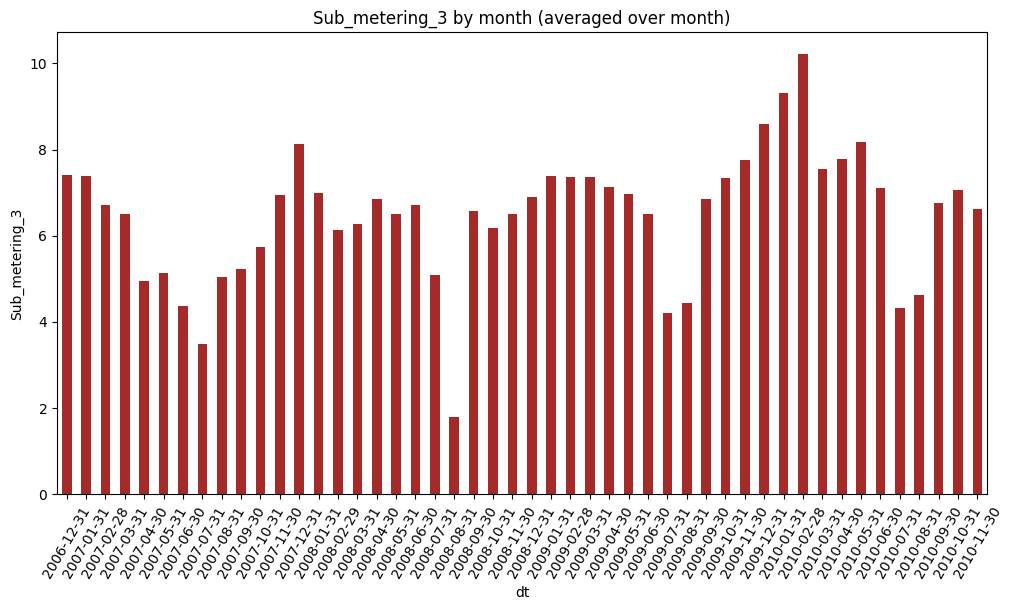

In [42]:
plt.figure(figsize=(12,6))
ax = df['sub_metering_3'].resample('ME').mean().plot(kind='bar', color='brown')
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in xticks_dates], rotation=60,fontdict={"size":10})
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 by month (averaged over month)')
plt.show()

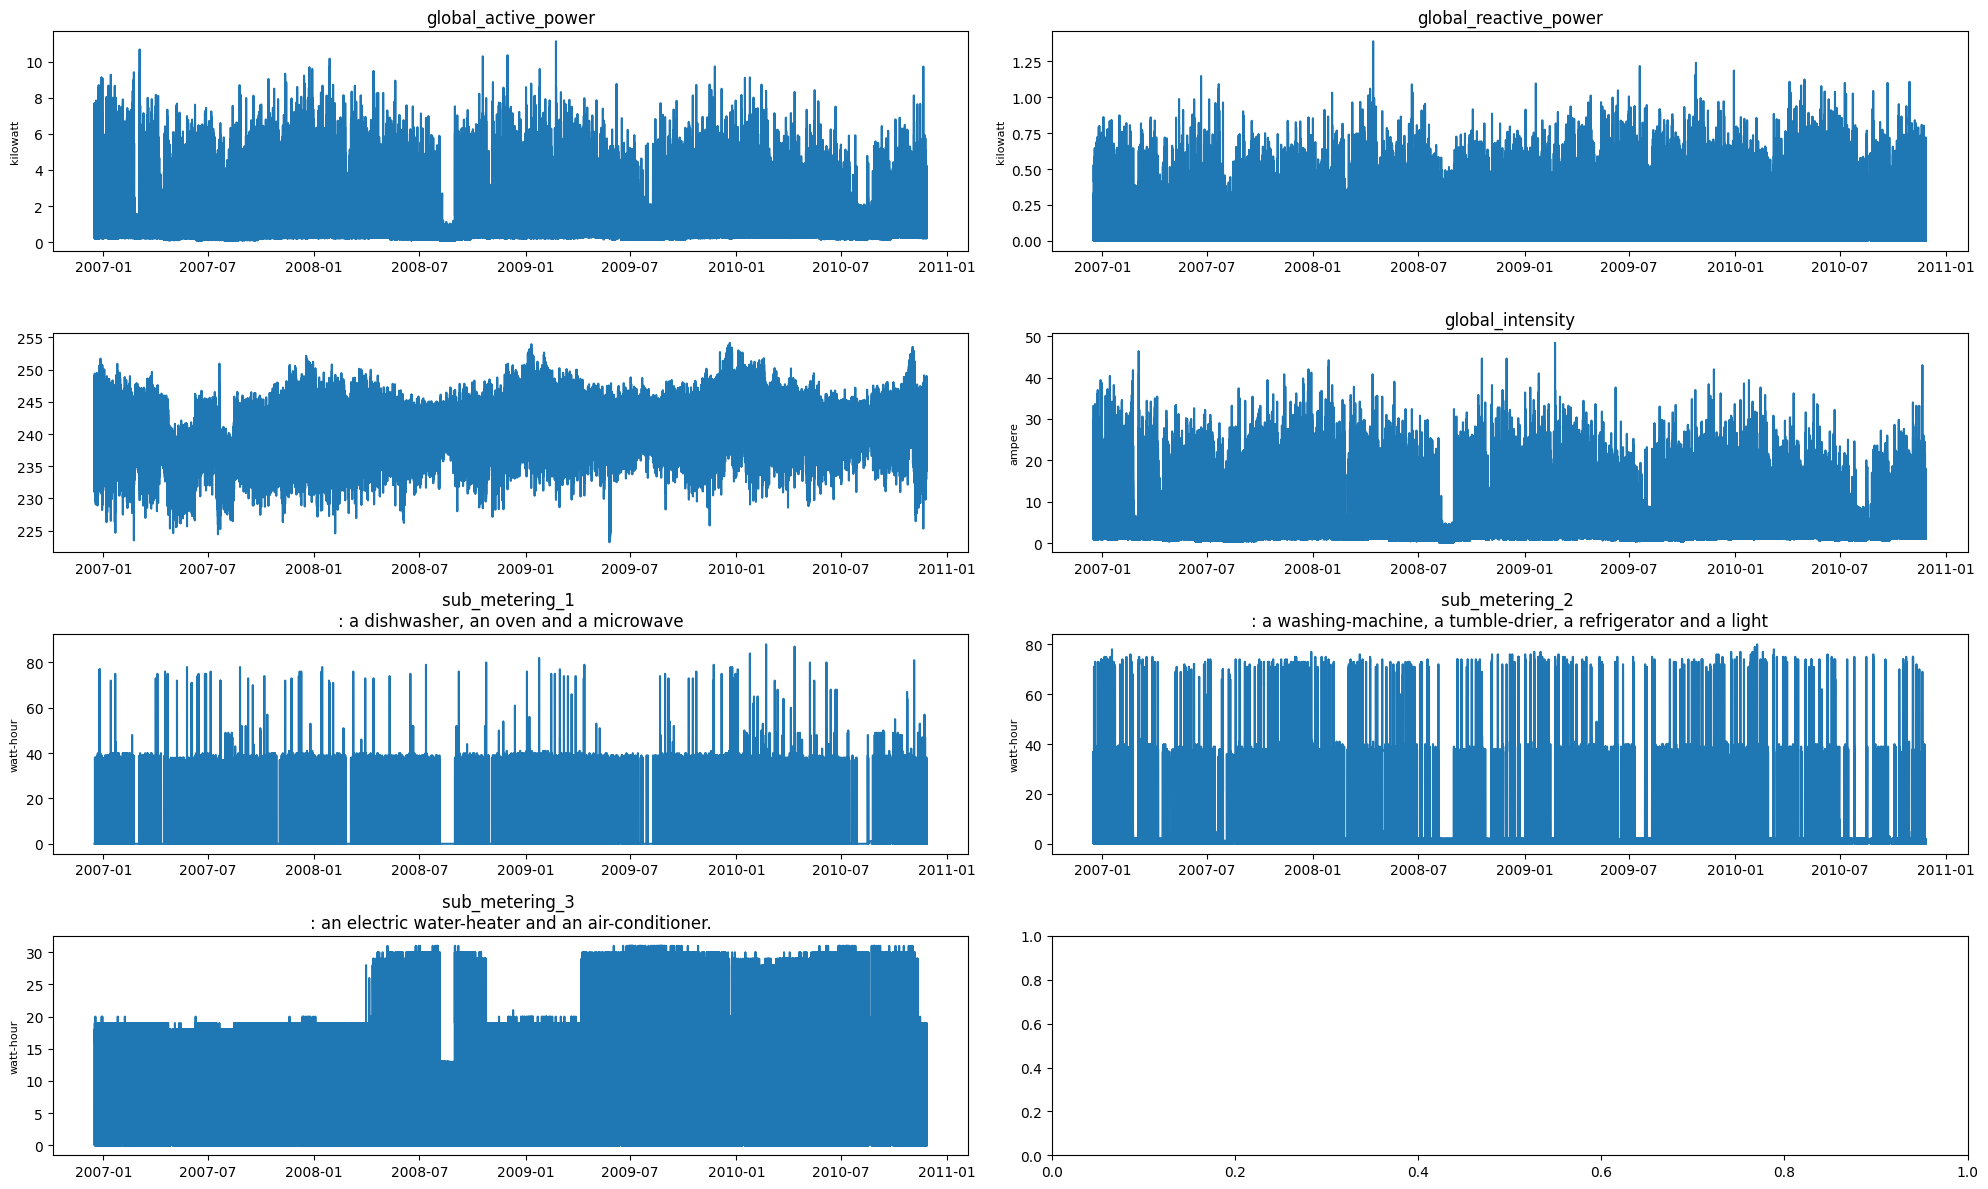

In [43]:
meters = {'power': 'kilowatt',
          'Voltage': 'volt',
          'intensity': 'ampere',
          'metering': 'watt-hour'}

fig, axs = plt.subplots(4, 2, figsize=(20, 12))
for i, col in enumerate(df.columns):
    row       = i // 2  # Calculate the row index
    col_index = i % 2   # Calculate the column index
    axs[row, col_index].plot(df.index, df[col])  # Access the subplot using two indices
    if 'power' in col:
        axs[row, col_index].set_title(col)  # Set title for each subplot
        axs[row, col_index].set_ylabel(meters['power'], fontsize=8)
    elif 'Voltage' in col:
        axs[row, col_index].set_ylabel(meters['Voltage'], fontsize=8)
        axs[row, col_index].set_title(col)  # Set title for each subplot
    elif 'intensity' in col:
        axs[row, col_index].set_ylabel(meters['intensity'], fontsize=8)
        axs[row, col_index].set_title(col)  # Set title for each subplot
    elif 'metering' in col:
        axs[row, col_index].set_ylabel(meters['metering'], fontsize=8)
        if '1' in col:
            axs[row, col_index].set_title(col + ' \n: a dishwasher, an oven and a microwave')
        elif '2' in col:
            axs[row, col_index].set_title(col + ' \n: a washing-machine, a tumble-drier, a refrigerator and a light')
        elif '3' in col:
            axs[row, col_index].set_title(col + ' \n: an electric water-heater and an air-conditioner.')

plt.tight_layout()
plt.show()

- There is a huge reduction in all parameters during a short period between 2008-07 and 2008-10.<br>
- In addition to the above-mentioned period, there are some smaller periods with similar behaviors throughout all the datetimes.<br>
- here are two periods with a sharp decrease in voltage between 2008-04 and 2008-09.<br>
- There are several spikes in Submetering_1 and Submetering_2.<br>
- There is an approximately steady behavior in Submetering_3, except for the ending periods with a significant fluctuation in power consumption.

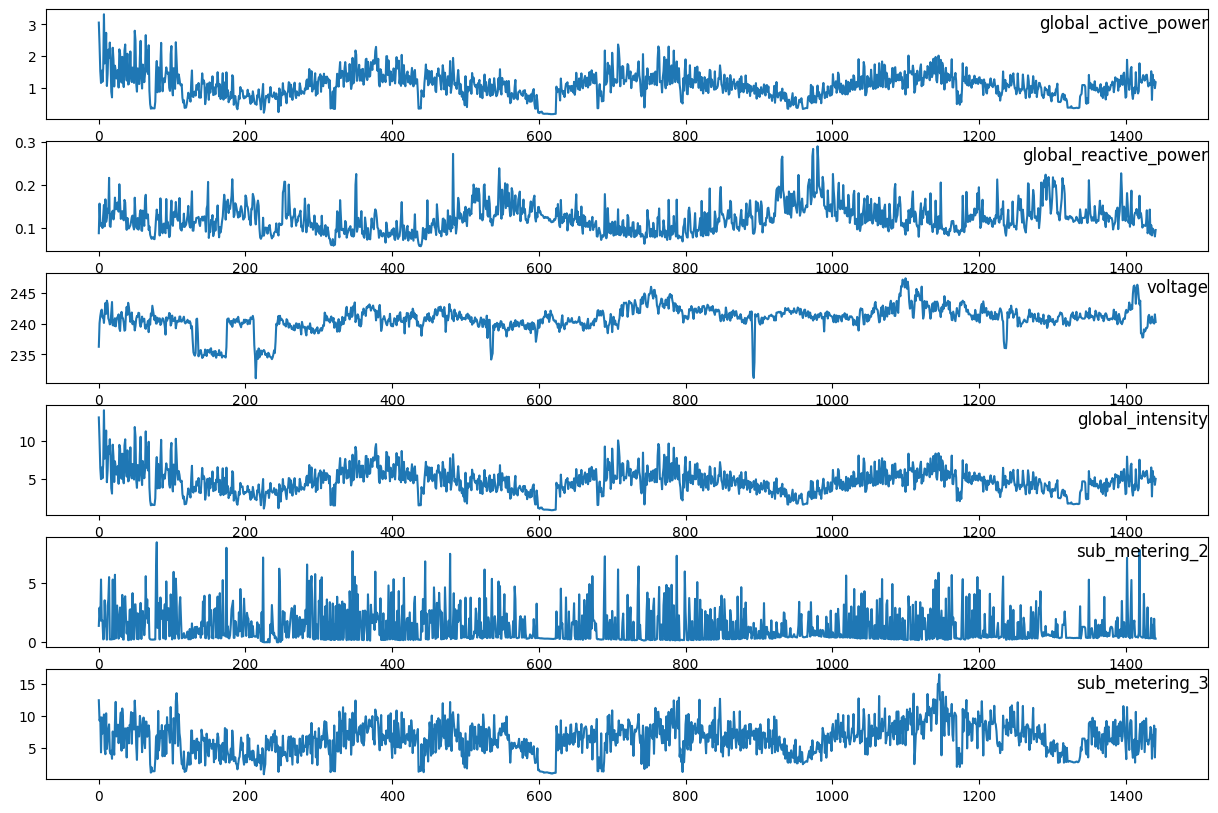

In [44]:
# Below I compare the mean of different featuresresampled over day.
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

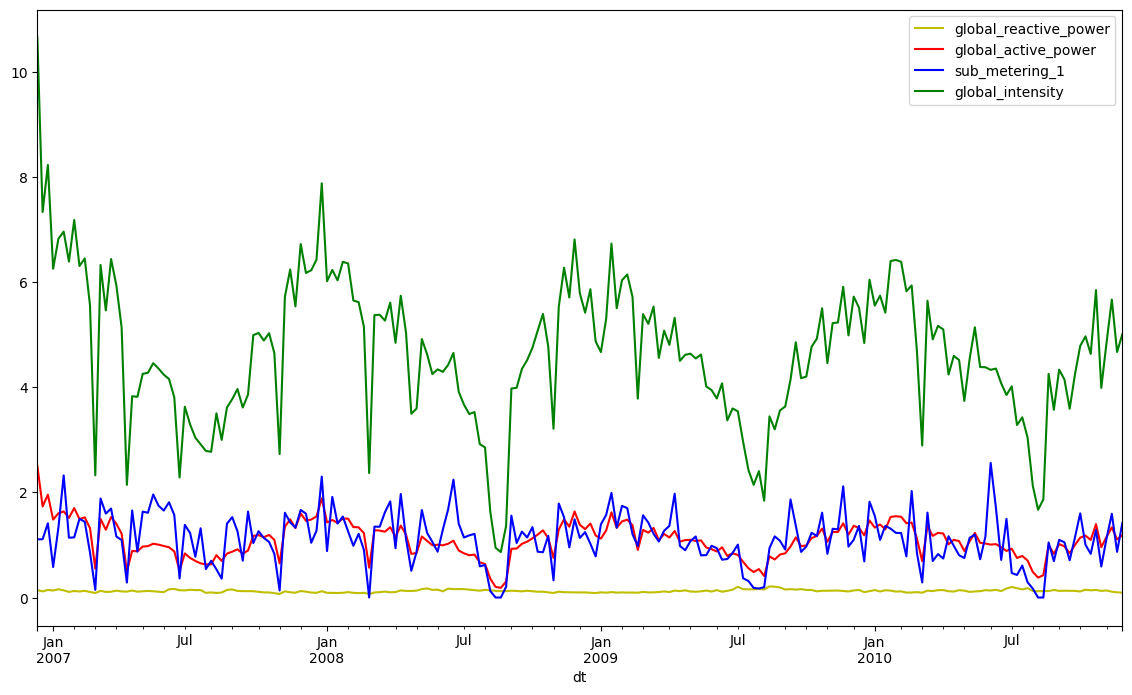

In [45]:
## resampling over week and computing mean

plt.figure(figsize=(14,8))
df.global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.global_active_power.resample('W').mean().plot(color='r', legend=True)
df.sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

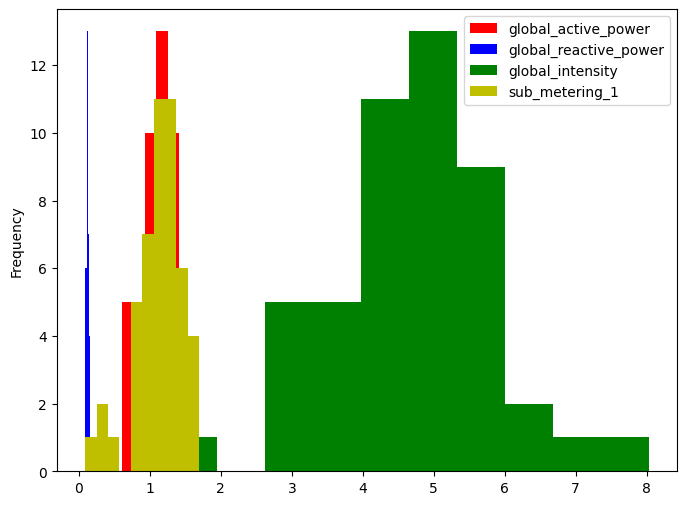

In [46]:
# Below I show hist plot of the mean of different feature resampled over month
plt.figure(figsize=(8,6))
df.global_active_power.resample('ME').mean().plot(kind='hist', color='r', legend=True )
df.global_reactive_power.resample('ME').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.global_intensity.resample('ME').mean().plot(kind='hist', color='g', legend=True)
df.sub_metering_1.resample('ME').mean().plot(kind='hist', color='y', legend=True)
plt.show()

## ***4.Correlations among features***

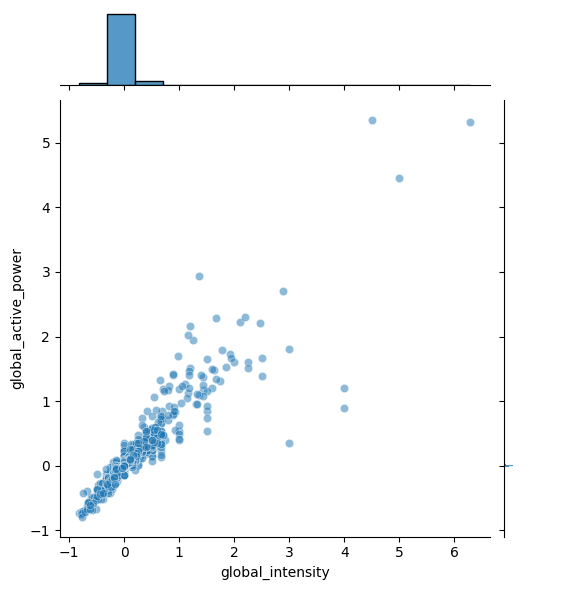

In [47]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change() # compute the percentage change of the data
data_sample = data_returns.sample(n=5000, random_state=42) # sample data for reducing the computation
sns.jointplot(x='global_intensity', y='global_active_power', data=data_sample, kind="scatter", alpha=0.5)

plt.show()

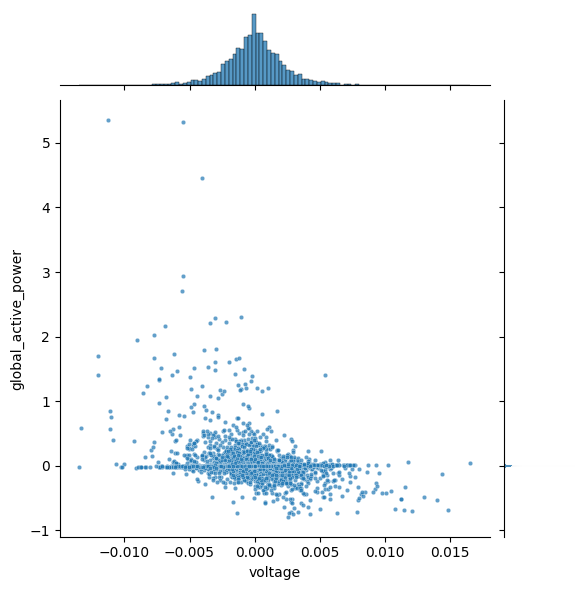

In [48]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='voltage', y='global_active_power', data=data_sample, kind="scatter", alpha=0.7, s=10)
plt.show()

#### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

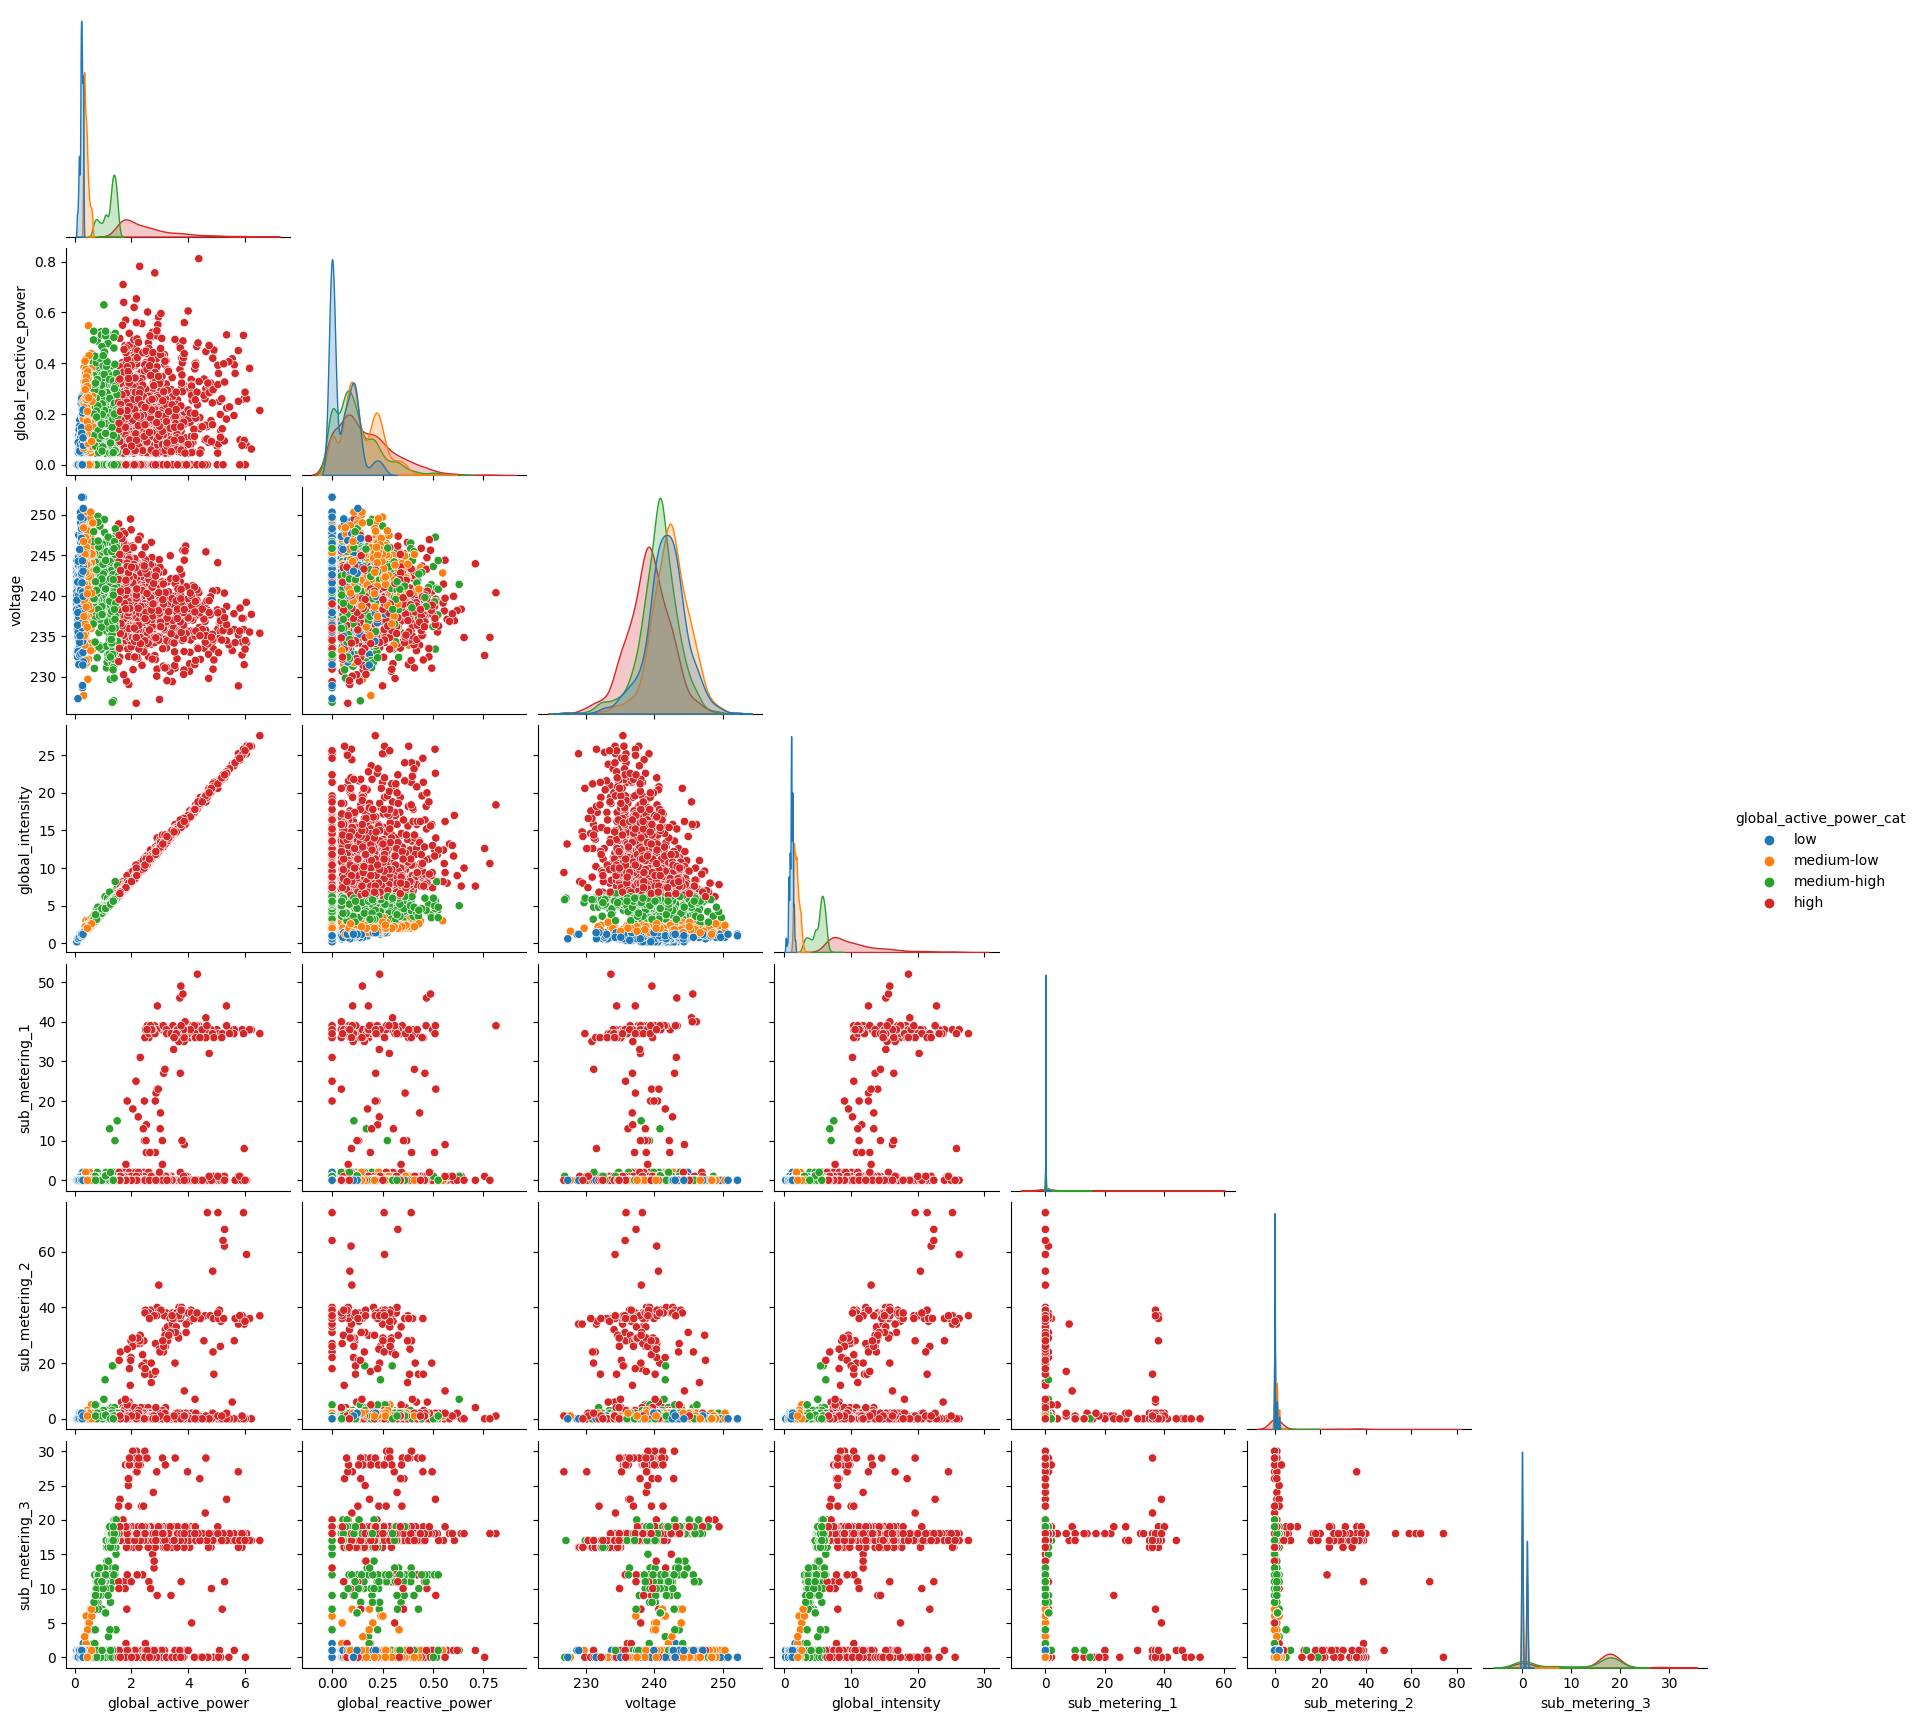

In [49]:
# The pairplot is a great way to show the bivariate relationships between each pair of features.
df_sample = df.sample(n=5000, random_state=42)
df_sample["global_active_power_cat"] = pd.qcut(df_sample["global_active_power"], q=4, labels=["low", "medium-low", "medium-high", "high"])
sns.pairplot(df_sample, hue="global_active_power_cat", corner=True);

In [39]:
df.head()

global_active_power  global_reactive_power  voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [40]:
df.corr(method='spearman') # I use spearman method because it is more robust to outliers than pearson and measure the monotonic 
                           # relationship between two continuous or ordinal variables

global_active_power  global_reactive_power   voltage  \
global_active_power               1.000000               0.266843 -0.327121   
global_reactive_power             0.266843               1.000000 -0.094692   
voltage                          -0.327121              -0.094692  1.000000   
global_intensity                  0.995525               0.294988 -0.350782   
sub_metering_1                    0.324621               0.124556 -0.175124   
sub_metering_2                    0.187453               0.431917 -0.093525   
sub_metering_3                    0.611548               0.074071 -0.187378   

                       global_intensity  sub_metering_1  sub_metering_2  \
global_active_power            0.995525        0.324621        0.187453   
global_reactive_power          0.294988        0.124556        0.431917   
voltage                       -0.350782       -0.175124       -0.093525   
global_intensity               1.000000        0.326048        0.201651   
sub_metering_1                 0.326048        1.000000        0.116086   
sub_metering_2                 0.201651        0.116086        1.000000   
sub_metering_3                 0.608248        0.160727        0.054649   

                       sub_metering_3  
global_active_power          0.611548  
global_reactive_power        0.074071  
voltage                     -0.187378  
global_intensity             0.608248  
sub_metering_1               0.160727  
sub_metering_2               0.054649  
sub_metering_3               1.000000

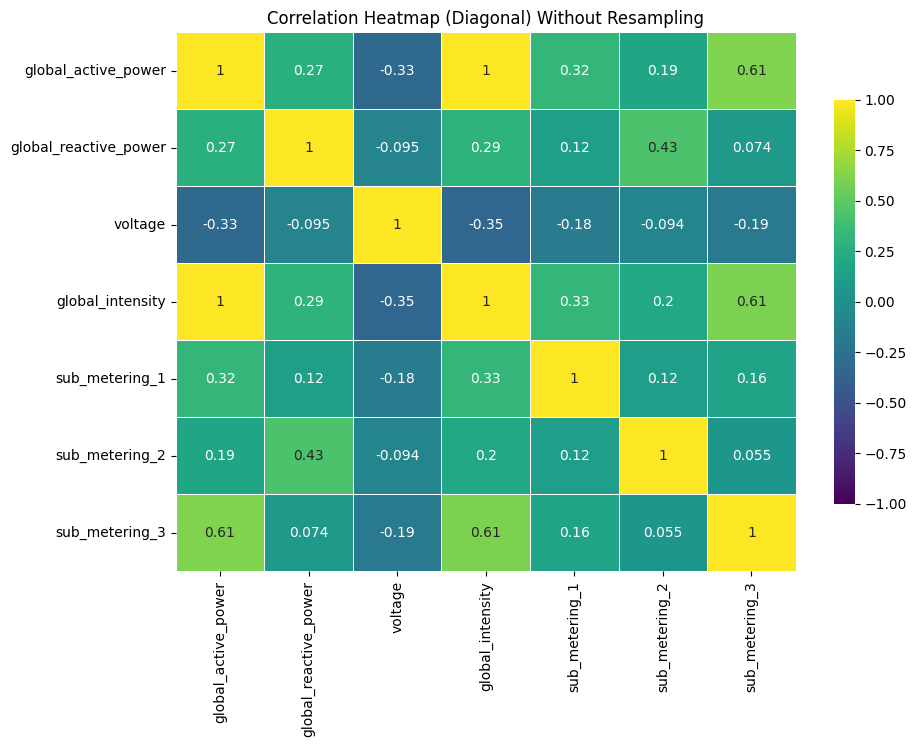

In [52]:
# Setting up the figure and axis
plt.figure(figsize=(10, 7))

# Drawing the heatmap
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="viridis",
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal) Without Resampling")

plt.show()

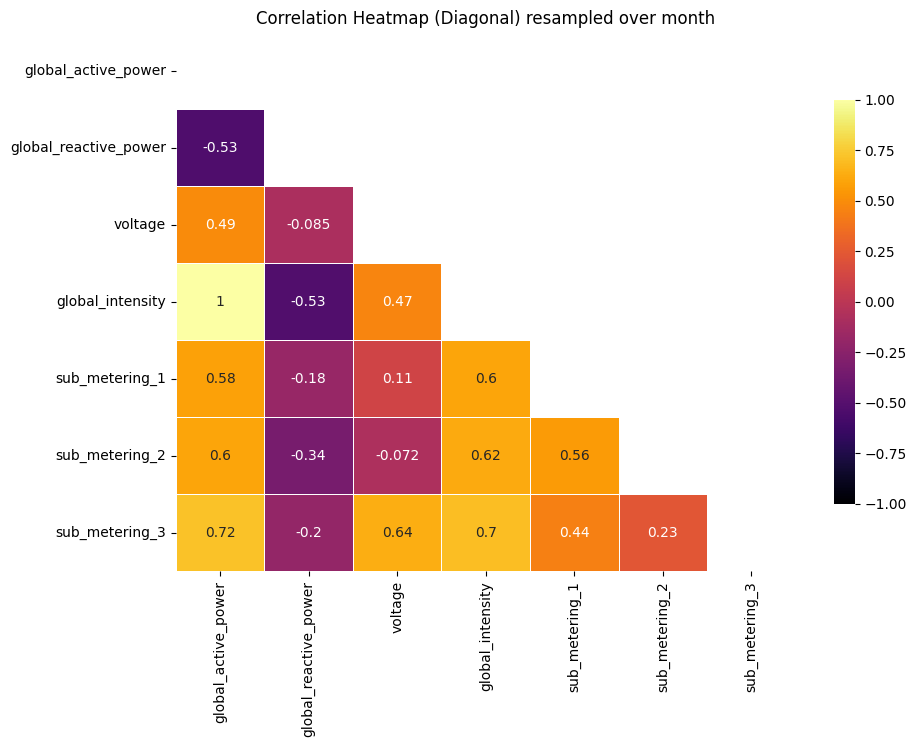

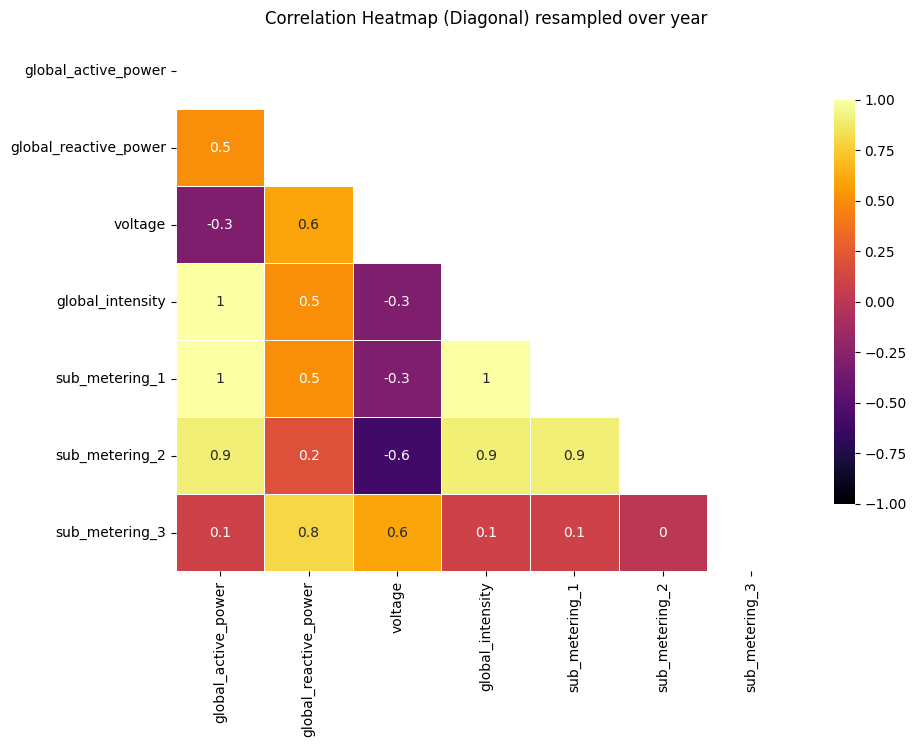

In [53]:
# Correlations of mean of features resampled over months

# Mask for the upper triangle
mask = np.triu(np.ones_like(df.resample('ME').mean().corr(method='spearman'), dtype=bool))

# Setting up the figure and axis
plt.figure(figsize=(10, 7))

# Drawing the heatmap
sns.heatmap(df.resample('ME').mean().corr(method='spearman'), annot=True, mask=mask, cmap="inferno",
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal) resampled over month")

plt.show()


# Correlations of mean of features resampled over years

# Mask for the upper triangle
mask = np.triu(np.ones_like(df.resample('Y').mean().corr(method='spearman'), dtype=bool))

# Setting up the figure and axis
plt.figure(figsize=(10, 7))

# Drawing the heatmap
sns.heatmap(df.resample('Y').mean().corr(method='spearman'), annot=True, mask=mask, cmap="inferno",
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal) resampled over year")

plt.show()

#### ***It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature  engineering.***

## ***5.MODELING***

### 5.1. Model Preparation

#### ***_5.1.1. Calculating and Adding Power Factor_***
In power sytems analysis there is a important term called power factor.In this section, we will calculate the power factor from the active and reactive power, and add it as a new feature to our scaled DataFrame.<br>

Power factor is an important measure in electrical systems, indicating how efficiently energy is being used. A power factor close to 1 indicates high efficiency, while a low power factor suggests inefficient energy use.<br>

### What is Power Factor?
Power factor is the ratio of the **active power (P)** used in an electrical system to the **apparent power (S)** drawn. Mathematically, it is expressed as:

Power Factor (PF) = Active Power (P) / Apparent Power (S)


#### Where:
- **Active Power (P):** The actual power that performs useful work *(kW – kilowatt)*.
- **Reactive Power (Q):** The power used to generate magnetic fields but does not contribute to useful work *(kVAR – kilovolt-ampere-reactive)*.
- **Apparent Power (S):** The total power drawn from the source *(kVA – kilovolt-ampere)*.

The relationship between these three is given by:

S² = P² + Q²


And the power factor is calculated as:

cos(θ) = P / S

#### Look at the picture below <br>
<br><img src="https://upload.wikimedia.org/wikipedia/commons/d/d8/Cmplxpower.svg" alt="Power Factor" width="300" height="300"> <br>
Q is Reactive Power which flows back and forth between source and load  
R is Active power that directly consumed on the demand side  
S is Apparent power that is the product of the RMS values of voltage and current.

---

### Why is Power Factor Important?
1. **Energy Efficiency:** A low power factor causes more current to be drawn, increasing energy losses.
2. **Electricity Costs:** Businesses with a low power factor may be subject to penalty charges for drawing unnecessary reactive power from the grid.
3. **Equipment Lifespan:** High currents put stress on cables and transformers, shortening their lifespan.
4. **Grid Capacity:** A good power factor ensures the efficient operation of the electrical grid and prevents unnecessary overloading.

The **ideal power factor should be close to 1** *(e.g., 0.95 or higher)*. To correct a low power factor, **capacitors or power factor correction devices** are used.


We will use the standard formulas to calculate apparent power and power factor from active and reactive power. We will then add this new feature to the `df_scaled` DataFrame for further analysis and modeling.<br><br>

In [11]:
active_power_sq = np.square(df['global_active_power'])
reactive_power_sq = np.square(df['global_reactive_power'])

apparent_power = np.sqrt(active_power_sq + reactive_power_sq)

# Compute numerator once
power_factor = df['global_active_power'] / apparent_power


df['power_factor'] = power_factor

df.head()

global_active_power  global_reactive_power  voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     sub_metering_3  power_factor  
dt                                                 
2006-12-16 17:24:00            17.0      0.995121  
2006-12-16 17:25:00            16.0      0.996708  
2006-12-16 17:26:00            17.0      0.995734  
2006-12-16 17:27:00            17.0      0.995688  
2006-12-16 17:28:00            17.0      0.989787

In [12]:
df.drop(['global_active_power', 'global_reactive_power'], axis=1, inplace=True)
df.head()

voltage  global_intensity  sub_metering_1  \
dt                                                               
2006-12-16 17:24:00   234.84              18.4             0.0   
2006-12-16 17:25:00   233.63              23.0             0.0   
2006-12-16 17:26:00   233.29              23.0             0.0   
2006-12-16 17:27:00   233.74              23.0             0.0   
2006-12-16 17:28:00   235.68              15.8             0.0   

                     sub_metering_2  sub_metering_3  power_factor  
dt                                                                 
2006-12-16 17:24:00             1.0            17.0      0.995121  
2006-12-16 17:25:00             1.0            16.0      0.996708  
2006-12-16 17:26:00             2.0            17.0      0.995734  
2006-12-16 17:27:00             1.0            17.0      0.995688  
2006-12-16 17:28:00             1.0            17.0      0.989787

In [13]:
 df.to_csv('df_before_modeling.csv',index=True)

### **I want to do the trend and seasonal decomposition analyses that I did for'global_active_power' in the previous sections for the power factor here.**

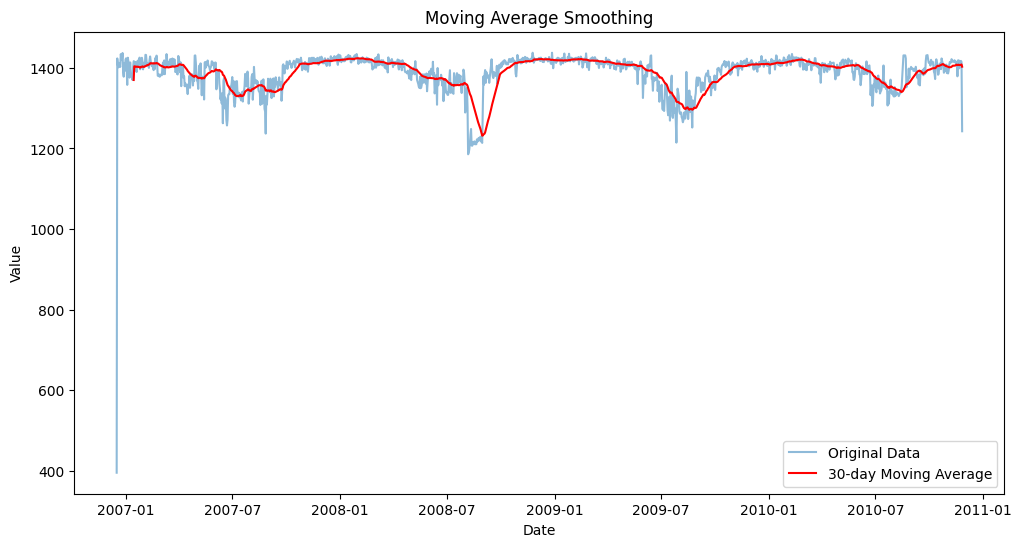

In [57]:
# Trend Analysis with Moving Average

df_resampled1 = df.power_factor.resample('D').sum().to_frame()

# 30-day moving average calculation
df_resampled1['Moving_Avg'] = df_resampled1.power_factor.rolling(window=30).mean()

# Graph
plt.figure(figsize=(12,6))
plt.plot(df_resampled1.power_factor, label='Original Data', alpha=0.5)
plt.plot(df_resampled1['Moving_Avg'], label='30-day Moving Average', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Moving Average Smoothing")
plt.show()

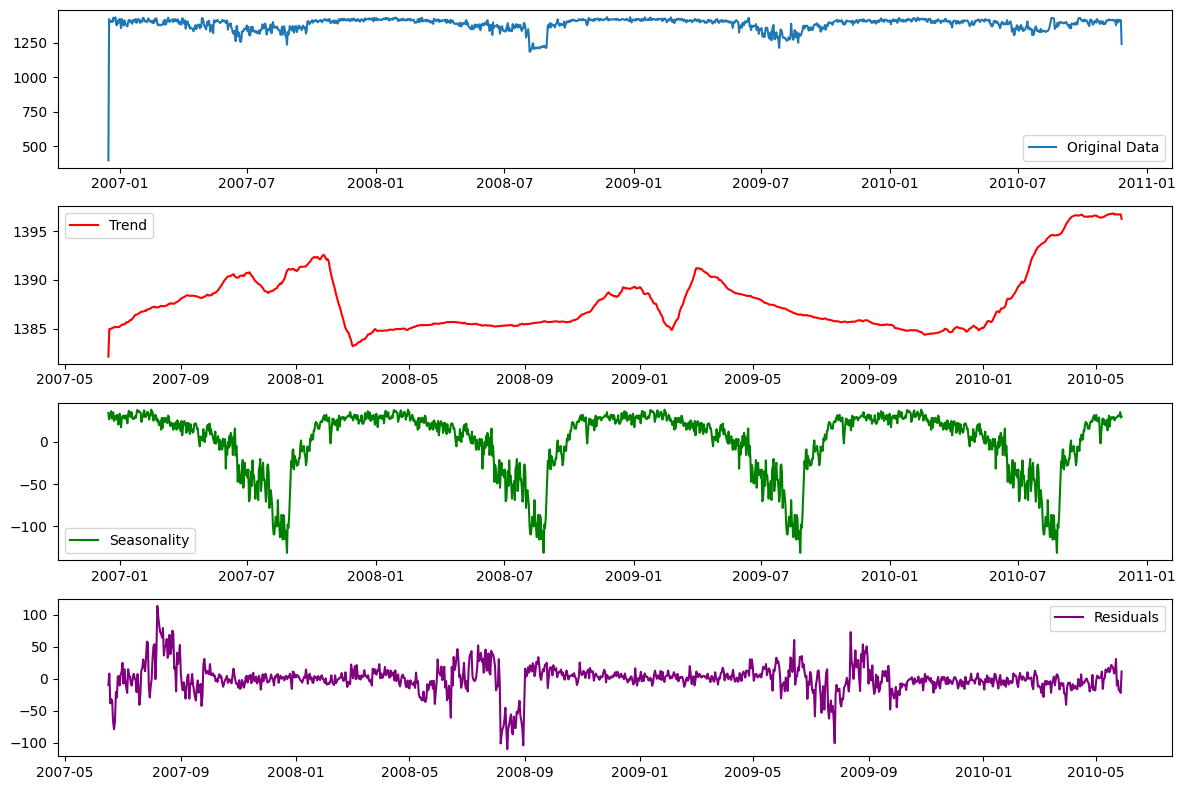

In [58]:
# seasonal_decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_resampled1['power_factor'], model='additive', period=365)  # Annual seasonalperiyodu (365 gün)

# Plotting the results
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df_resampled1['power_factor'], label='Original Data')
plt.legend()

plt.subplot(4,1,2)
plt.plot(result.trend, label='Trend', color='red')
plt.legend()

plt.subplot(4,1,3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(result.resid, label='Residuals', color='purple')
plt.legend()

plt.tight_layout()
plt.show()


### ***Power Factor time series decomposition in detail:***

***Original Data (Blue Graph):***<br><br>
- Data ranges approximately between 1000-1250<br>
- Shows very stable behavior, except for sudden drops<br>
- Has several significant drop points, especially in 2008 and 2009<br>
- Generally high and stable power factor (close to 1) indicates efficient system operation<br>
***Trend Component (Red Graph):*** <br><br>
- Moves within the 1385-1395 band<br>
- Forms a peak at the beginning of 2008<br>
- Shows a slight downward trend in mid-2009<br>
- Enters an upward trend towards 2010<br>
- Shows minimal changes overall, indicating stable system operation<br>
***Seasonality (Green Graph):*** <br><br>
- Clear seasonal pattern present<br>
- Seasonal fluctuations between -100 and +50<br>
- Regular recurring patterns visible each year<br>
- Lower amplitude seasonal effects compared to Global Active Power<br>
***Residuals (Purple Graph):*** <br><br>
- Residuals generally within -100 to +50 band<br>
- Shows a large negative deviation in mid-2008<br>
- Variance is generally stable, with increases in some periods<br>
- Less volatile compared to Global Active Power<br>
***Comparative Insights with Global Active Power:*** <br><br>
Power factor shows much more stable behavior, which is expected as it should typically remain close to 1.
The amplitude of seasonal effects is lower in power factor, indicating successful reactive power compensation.
Both series show significant changes during 2008-2009, suggesting important changes in system or load during this period.
Residuals in power factor are less volatile compared to global active power, indicating good power factor control.<br>

***Recommendations:*** <br><br>

- Detailed investigation of periods with large deviations<br>
- Review of compensation system during seasonal decline periods<br>
- Evaluation of long-term system performance through trend analysis<br>
- Detailed correlation analysis between the two features<br>

***Conclusion:*** <br><br>

***When comparing the analyses, we observe that Global Active Power shows significant seasonal fluctuations, while Power Factor maintains a more stable pattern. This indicates that despite seasonal changes in electricity consumption, the system's power quality is well maintained. While Global Active Power shows more pronounced trend changes, Power Factor's trend line remains more stable, indicating that the system continues to operate efficiently.
In terms of electricity consumption, high power factor values ranging between 0.95-1.00 demonstrate that the system is operating efficiently and electricity costs are optimized. It's important to monitor system capacity and implement load balancing during periods of significant seasonal changes. Additionally, regular maintenance and control of reactive power compensation systems are crucial for the system's long-term performance. Based on this data, it's recommended to plan operations according to energy consumption patterns and take special measures during peak consumption periods.***

### ***5.2. Model Selection:***

#### ***5.2.1.ARIMA/SARIMA MODELS***

ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

SARIMA : Seasonal ARIMA

SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

Steps for building ARIMA-SARIMA models:
1. ***Check Stationarity:***<br>
Verify the stationarity of each series using tests like ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Display with ACF and PACF plots.<br>

2. ***Make Series Stationary:***<br>
Apply transformations to make the target and exogenous variables stationary if needed. Common methods include differencing and log transformations.

3. ***Model the Relationship:***<br>
Use the stationary series in your ARIMA or SARIMA model.

For ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models, it is essential to make the time series data stationary before fitting the model. These models assume that the time series data is stationary, meaning that its statistical properties such as mean, variance, and autocorrelation structure do not change over time. If the data is non-stationary, it can lead to biased parameter estimates and unreliable forecasts.

To make the data stationary, you typically need to remove trends and seasonality. This can be done through techniques like taking differences (for removing trends) and seasonal differencing (for removing seasonality). Once the data is stationary, you can then fit the ARIMA or SARIMA model to the transformed data.

#### ***5.2.1.1.Checking Stationarity:***

The observations in a stationary time series are not dependent on time.<br>

Time series are ***stationary*** if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.<br>

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.<br>
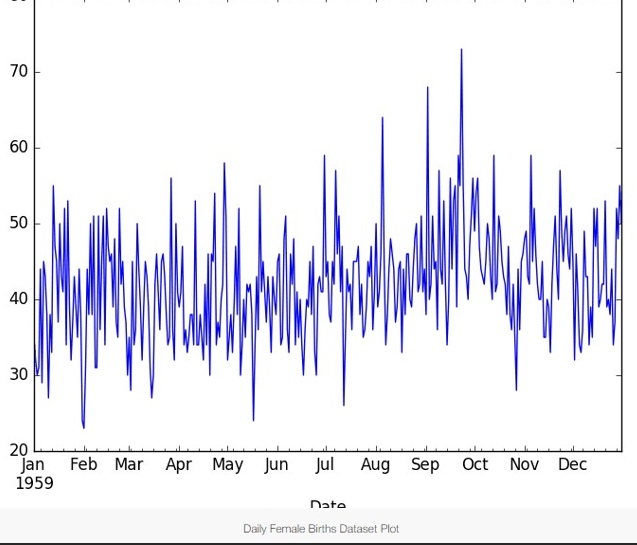

Observations from a ***non-stationary*** time series show seasonal effects, trends, and other structures that depend on the time index.<br>

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.<br>

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.<br>

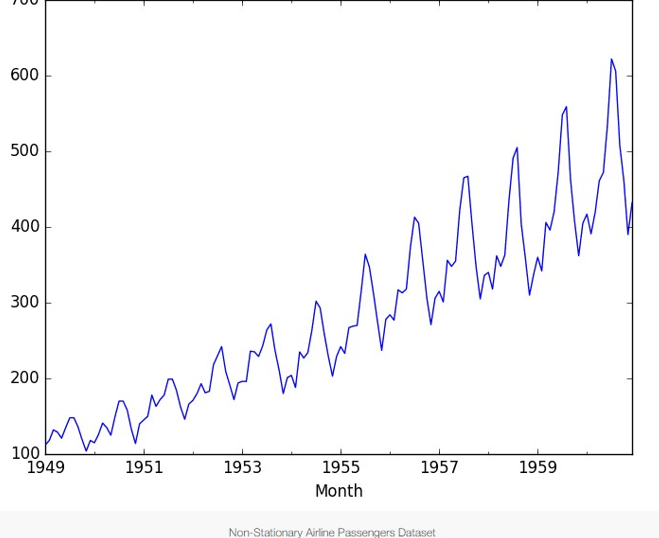

ACF and PACF:

1. Autocorrelation Function (ACF):<br><br>
- The ACF measures the correlation between a time series and its lagged values at different lag intervals.<br>
- On the x-axis, you have the lag or time interval.<br>
- The y-axis represents the correlation coefficient, which ranges from -1 to 1.<br>
- Positive values indicate positive correlation (similar movement in the same direction), while negative values indicate negative correlation (opposite movement).<br>
- The shaded region represents the 95% confidence interval. Correlation values outside this region are considered statistically significant.<br>
- Significant spikes in the ACF plot indicate potential seasonal patterns or trends in the data.<br>
2. Partial Autocorrelation Function (PACF):<br><br>
* The PACF measures the correlation between a time series and its lagged values, controlling for the effects of other lags in between.<br>
* It helps identify the direct relationship between a data point and its lagged values, excluding the influence of other lags.<br>
* Similar to the ACF plot, the x-axis represents the lag or time interval, and the y-axis represents the correlation coefficient.<br>
* Significant spikes in the PACF plot indicate the number of lag terms to include in autoregressive models (AR).<br>
* Interpreting these plots helps identify potential patterns, trends, and seasonality in the time series data, providing insights for modeling and forecasting.<br>
* If there are clear patterns like seasonality in the ACF and PACF plots, it suggests that the data exhibits periodic behavior.<br> - This implies that there are recurring patterns or cycles in the data over time, which can be important for understanding and forecasting future values.<br>

❔ Lagged Values ❔<br>
Lagged values, in the context of time series analysis, refer to the values of a variable (or series) at previous time points. When we say "lagged by k time units," it means we're looking at the value of the variable k time points in the past.<br>

For example, if we have daily temperature data for a city, and we want to analyze the temperature at time t (today) with respect to the temperature at time t-1 (yesterday), we're looking at a lag of 1 day. Similarly, if we're interested in the temperature at time t with respect to the temperature two days ago (t-2), we're looking at a lag of 2 days.<br>

Lagged values are essential in time series analysis for understanding temporal dependencies, identifying patterns, and building forecasting models. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help visualize the correlation between the original time series and its lagged values at different time intervals.<br>

❔ Ideal ACF and PACF plots ❔<br>
ACF Plot:<br>
We ideally want the autocorrelation values to start from high positive values and gradually decrease as the lag increases.
The autocorrelation values should approach zero as the lag becomes large.<br>
A gradual decay in autocorrelation indicates that the past observations have some influence on the current observation but that influence diminishes as we move further into the past.<br>
PACF Plot:<br>
We ideally want partial autocorrelation values to start from high values at lag 1 and then drop off sharply to zero or close to zero for subsequent lags.<br>
Significant spikes at lower lags (especially lag 1) indicate a strong direct relationship between the current observation and past observations.<br>
A sudden drop-off in partial autocorrelation beyond a certain lag indicates that the effects of intermediate observations are explained by more recent observations.<br>
These ideal patterns in ACF and PACF plots help in identifying the order of autoregressive (AR) and moving average (MA) terms in time series models such as ARIMA (Autoregressive Integrated Moving Average).<br>
image.png

Sources:<br>

https://spureconomics.com/autocorrelation-function-and-stationarity/#:~:text=The%20ACF%20and%20PACF%20plots%20are%20helpful%20in%20determining%20the,models%20to%20decide%20their%20structure.<br>

https://spureconomics.com/interpreting-acf-and-pacf-plots/

In [59]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


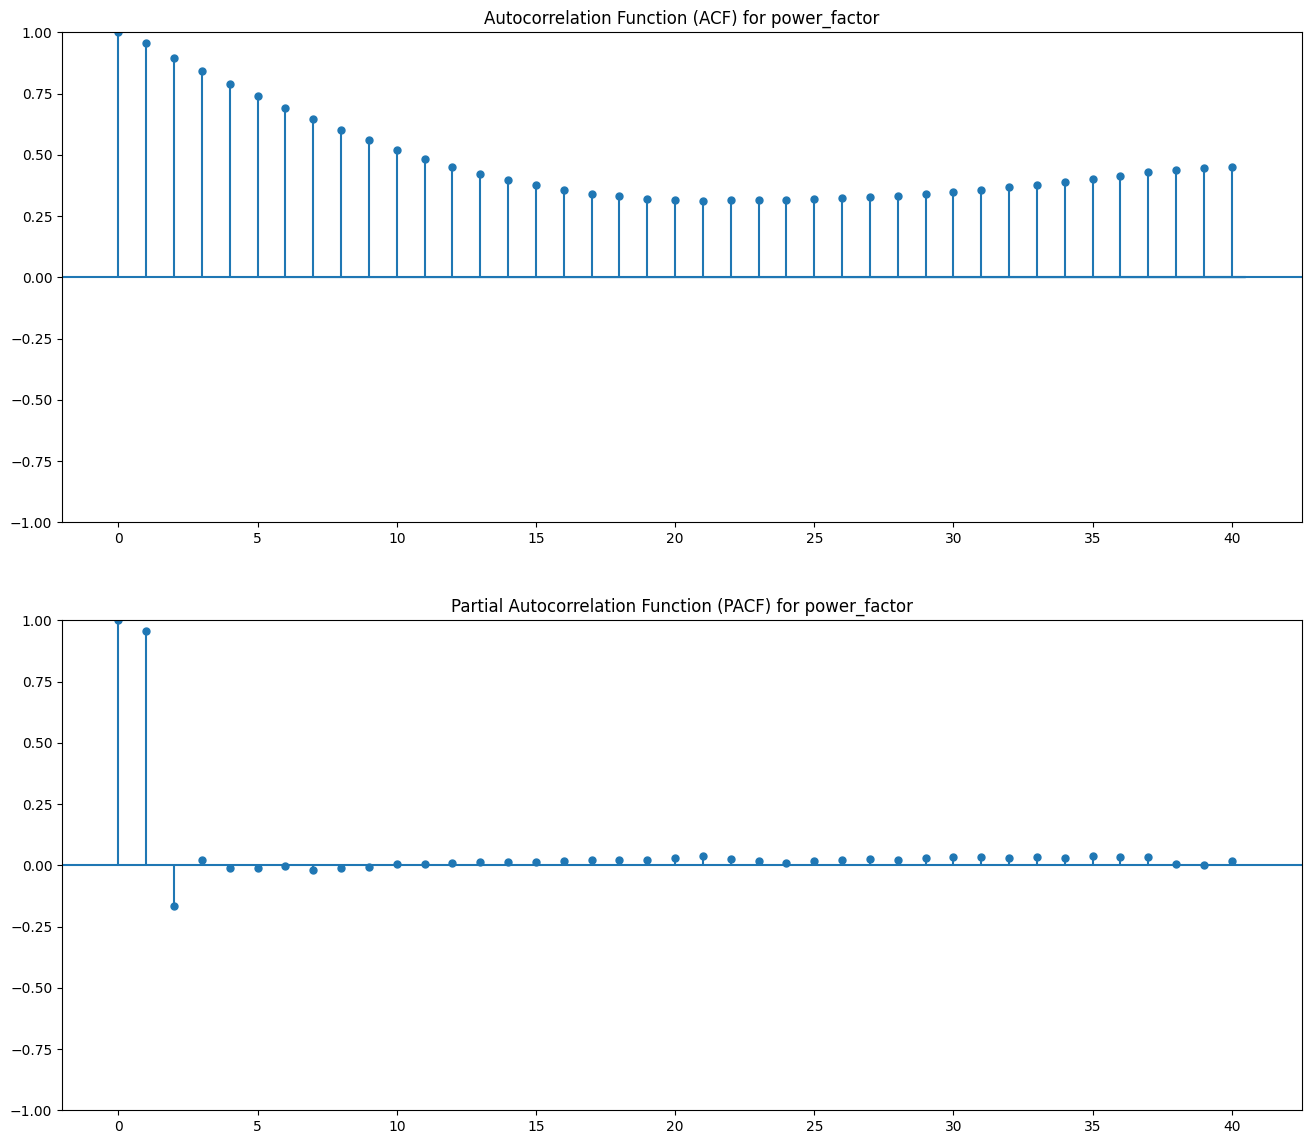

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Plot ACF
plot_acf(df['power_factor'], ax=axes[0], lags=40,fft=True, title='Autocorrelation Function (ACF) for power_factor') # fft=True is for using Fast Fourier Transform for faster computation

# Plot PACF
plot_pacf(df['power_factor'], ax=axes[1], lags=40,method="ywm", title='Partial Autocorrelation Function (PACF) for power_factor') # method="ywm" is for using Yule-Walker method for faster computation

plt.show()

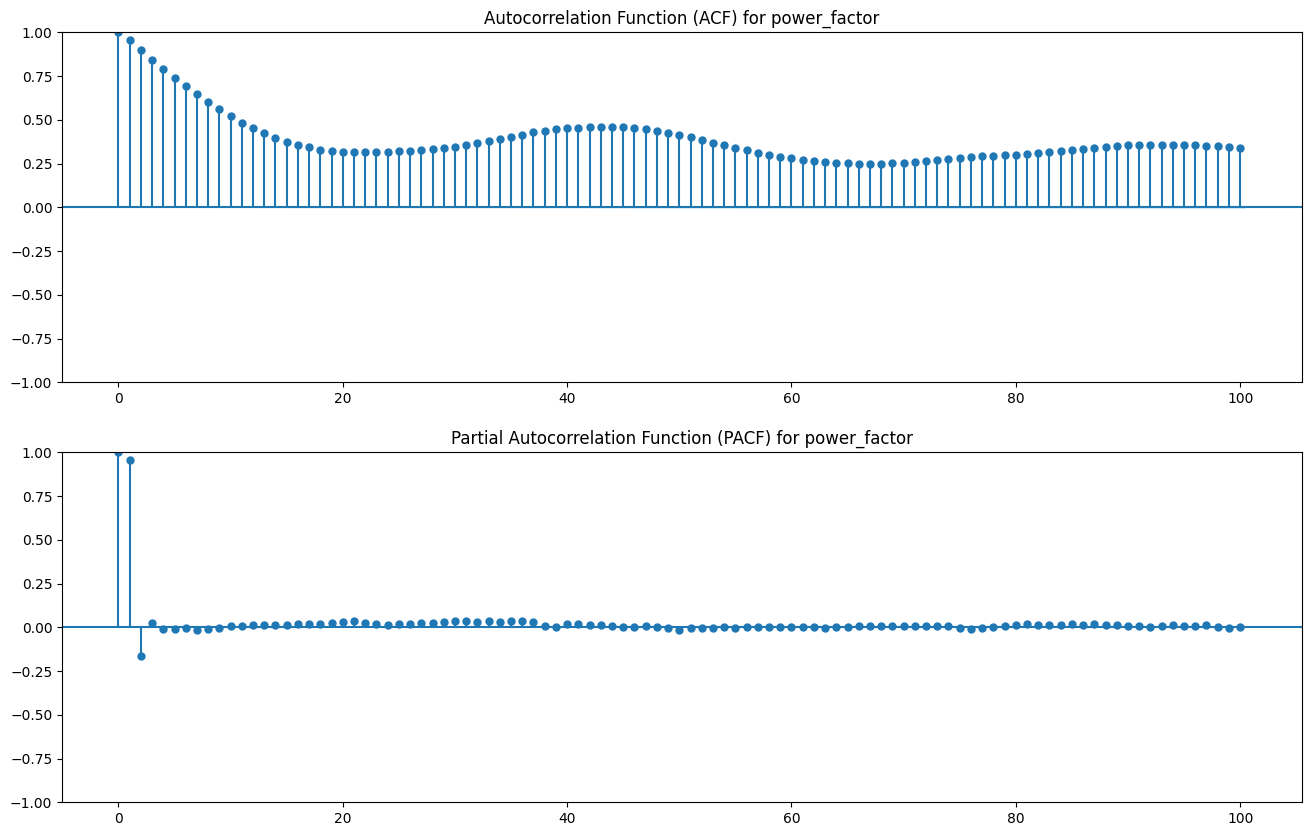

In [61]:
# Different lags number:I wanted to see it fo a long period

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot ACF
plot_acf(df['power_factor'], ax=axes[0], lags=100,fft=True, title='Autocorrelation Function (ACF) for power_factor') # fft=True is for using Fast Fourier Transform for faster computation

# Plot PACF
plot_pacf(df['power_factor'], ax=axes[1], lags=100,method="ywm", title='Partial Autocorrelation Function (PACF) for power_factor') # method="ywm" is for using Yule-Walker method for faster computation

plt.show()

The Series does not seem stationary, ACF has to become 0 at some point. But we are not certainly sure yet.<br>

Let's confirm with the ADF and KPSS tests..<br><br>

#### ***ADF and KPSS***<br>
To confirm the visual assessments of stationarity (due to trend and seasonality), the Dickey-Fuller and KPSS hypothesis tests are used:<br>

Augmented Dickey-Fuller Test (ADF)<br>

Null Hypothesis H0: The series is not stationary<br>
Alternative Hypothesis H1: The series is stationary<br><br>
Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)<br>

Null Hypothesis H0: The series is stationary<br>
Alternative Hypothesis H1: The series is not stationary<br><br>

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity2(series):
    print(f'\n___________________Checking Stationarity for: {series.name}___________________\n')

    # ADF Test
    adf_test = adfuller(series.values)
    print('ADF Test:\n')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    if (adf_test[1] <= 0.05) & (adf_test[4]['5%'] > adf_test[0]):
        print("\u001b[32mSeries is Stationary (ADF Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (ADF Test)\x1b[0m")

    print('\n' + '-'*50 + '\n')

    # KPSS Test
    kpss_test = kpss(series.values, regression='c', nlags='auto')
    print('KPSS Test:\n')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

    if kpss_test[1] > 0.05:
        print("\u001b[32mSeries is Stationary (KPSS Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (KPSS Test)\x1b[0m")

In [63]:
# Sample a smaller subset of the data for stationarity checks
df_sample = df.sample(n=10000, random_state=42)

# Check initial stationarity for each feature
check_stationarity2(df_sample['power_factor'])  # target is non stationary!!
check_stationarity2(df_sample['voltage'])
check_stationarity2(df_sample['global_intensity'])
check_stationarity2(df_sample['sub_metering_1'])
check_stationarity2(df_sample['sub_metering_2'])
check_stationarity2(df_sample['sub_metering_3'])


___________________Checking Stationarity for: power_factor___________________

ADF Test:

ADF Statistic: -99.162469
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.102124
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: voltage___________________



<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


ADF Test:

ADF Statistic: -98.094129
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.239757
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: global_intensity___________________



<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


ADF Test:

ADF Statistic: -99.068280
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.042092
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: sub_metering_1___________________



<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


ADF Test:

ADF Statistic: -69.243908
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.053618
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: sub_metering_2___________________



<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


ADF Test:

ADF Statistic: -57.986412
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.078936
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: sub_metering_3___________________



<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


ADF Test:

ADF Statistic: -68.923892
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.130016
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


<ipython-input-62-81cb300f3b58>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series.values, regression='c', nlags='auto')


In [64]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    series_values = series.to_numpy()  # Daha hızlı erişim için NumPy array'e çevir

    print(f'\n{"_"*20} Checking Stationarity for: {series.name} {"_"*20}\n')

    # ADF Test
    adf_stat, adf_p, _, _, adf_crit, _ = adfuller(series_values)
    adf_result = "\033[32mStationary\033[0m" if adf_p <= 0.05 else "\033[31mNon-stationary\033[0m"

    # KPSS Test
    kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')
    kpss_result = "\033[32mStationary\033[0m" if kpss_p > 0.05 else "\033[31mNon-stationary\033[0m"

    # Tek seferde büyük string oluşturarak yazdır
    output = (
        f"ADF Test:\n"
        f"  - ADF Statistic: {adf_stat:.6f}\n"
        f"  - p-value: {adf_p:.6f}\n"
        f"  - Critical Values: " + ", ".join([f"{k}: {v:.3f}" for k, v in adf_crit.items()]) + "\n"
        f"  => {adf_result} (ADF Test)\n\n"
        f"{'-'*50}\n\n"
        f"KPSS Test:\n"
        f"  - KPSS Statistic: {kpss_stat:.6f}\n"
        f"  - p-value: {kpss_p:.6f}\n"
        f"  - Critical Values: " + ", ".join([f"{k}: {v:.3f}" for k, v in kpss_crit.items()]) + "\n"
        f"  => {kpss_result} (KPSS Test)\n"
    )

    print(output)

In [46]:
df.columns

Index(['voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3', 'power_factor'],
      dtype='object')

In [66]:
# Sample a smaller subset of the data for stationarity checks
df_sample = df.sample(n=10000, random_state=42)

# Check initial stationarity for each feature
check_stationarity(df_sample['power_factor'])  # target is non stationary!!
check_stationarity(df_sample['voltage'])
check_stationarity(df_sample['global_intensity'])
check_stationarity(df_sample['sub_metering_1'])
check_stationarity(df_sample['sub_metering_2'])
check_stationarity(df_sample['sub_metering_3'])


____________________ Checking Stationarity for: power_factor ____________________



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


ADF Test:
  - ADF Statistic: -99.162469
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.102124
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)


____________________ Checking Stationarity for: voltage ____________________



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


ADF Test:
  - ADF Statistic: -98.094129
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.239757
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)


____________________ Checking Stationarity for: global_intensity ____________________



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


ADF Test:
  - ADF Statistic: -99.068280
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.042092
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)


____________________ Checking Stationarity for: sub_metering_1 ____________________



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


ADF Test:
  - ADF Statistic: -69.243908
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.053618
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)


____________________ Checking Stationarity for: sub_metering_2 ____________________



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


ADF Test:
  - ADF Statistic: -57.986412
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.078936
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)


____________________ Checking Stationarity for: sub_metering_3 ____________________

ADF Test:
  - ADF Statistic: -68.923892
  - p-value: 0.000000
  - Critical Values: 1%: -3.431, 5%: -2.862, 10%: -2.567
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.130016
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


#### ***The tests we performed showed that all the features were stationary, but if they were not stationary, we would have to apply the following methods.***<br><br>


***Methods to make a time series stationary:***<br>
Among the methods to make a time series stationary, differencing and detrending are two of the most common:<br>

***Differencing:*** Taking the difference between consecutive observations helps remove trends and make the series stationary. This method is simple and often effective, especially for time series with a linear trend.<br>

***Detrending:*** Removing a trend from the time series data is another common approach. This can involve fitting a regression model to the data and subtracting the trend component, or using other techniques like polynomial regression or moving averages to remove trend effects.<br>

These methods are widely used because they are relatively straightforward to implement and can effectively address trend-related non-stationarity in time series data.<br>

***Other methods:***<br>
Seasonal Differencing: Similar to differencing, but instead of taking differences between consecutive observations, take differences between observations separated by the seasonal period.<br>

***Transformation:*** Apply mathematical transformations to stabilize the variance or make the data more linear. Common transformations include taking the logarithm, square root, or Box-Cox transformation.<br>

***Smoothing:*** Apply moving averages or exponential smoothing to remove noise and smooth out the data.<br>

***Decomposition:*** Decompose the time series into its trend, seasonal, and residual components, and then remove the trend and seasonal components.<br>

***Regression:*** Fit a regression model with exogenous variables (if available) to the time series data and remove the effect of these variables.<br>

These methods can be applied individually or in combination, depending on the characteristics of the time series and the specific goals of the analysis. Experimentation and domain knowledge often play a crucial role in selecting the most appropriate method(s) for making a time series stationary.

In [14]:
df_daily = df.resample('D').mean() # Reducing computation time
df_daily['power_factor_detrended'] = df_daily['power_factor'].diff().fillna(0)
df_daily['power_factor_deseasonalized'] = df_daily['power_factor_detrended'].diff(periods=365).fillna(0)

In [15]:
df_daily['power_factor_deseasonalized'].sample(10)

dt
2008-02-16    0.003376
2009-12-11   -0.006231
2007-01-09    0.000000
2008-01-31   -0.012723
2008-04-18   -0.014323
2008-04-17   -0.007599
2008-09-16   -0.004615
2008-10-08   -0.002599
2007-11-12    0.000000
2009-08-17    0.011098
Name: power_factor_deseasonalized, dtype: float64

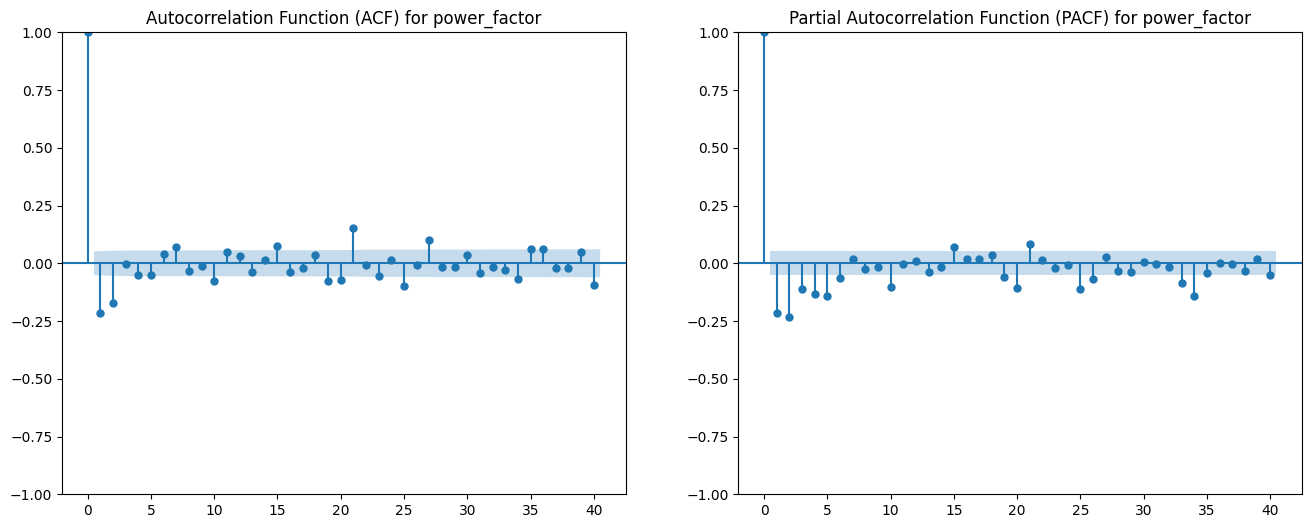

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(df_daily['power_factor_deseasonalized'], ax=axes[0], lags=40,fft=True, title='Autocorrelation Function (ACF) for power_factor') # fft=True is for using Fast Fourier Transform for faster computation

# Plot PACF
plot_pacf(df_daily['power_factor_deseasonalized'], ax=axes[1], lags=40,method="ywm", title='Partial Autocorrelation Function (PACF) for power_factor') # method="ywm" is for using Yule-Walker method for faster computation

plt.show()

In [70]:
check_stationarity(df_daily['power_factor_deseasonalized']);


____________________ Checking Stationarity for: power_factor_deseasonalized ____________________

ADF Test:
  - ADF Statistic: -9.323281
  - p-value: 0.000000
  - Critical Values: 1%: -3.435, 5%: -2.864, 10%: -2.568
  => Stationary (ADF Test)

--------------------------------------------------

KPSS Test:
  - KPSS Statistic: 0.139462
  - p-value: 0.100000
  - Critical Values: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
  => Stationary (KPSS Test)



<ipython-input-64-bb9af1ee8e72>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series_values, regression='c', nlags='auto')


#### ***5.2.1.2.ARIMA/SARIMA Model Implementation:***<br>

The meaning of p, d and q<br>
source: https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting#4.-AR-and-MA-models-

p:
p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.
d:

The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression mo**dels, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.

The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

q:
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

In [16]:
df_hourly = df.resample('H').mean()

In [17]:
df_hourly['power_factor_detrended'] = df_hourly['power_factor'].diff().fillna(0)
df_hourly['power_factor_deseasonalized'] = df_hourly['power_factor_detrended'].diff(periods=8760).fillna(0) # 365*24=8760

df_hourly['power_factor_deseasonalized'].sample(5)

dt
2007-09-28 07:00:00    0.000000
2007-10-12 12:00:00    0.000000
2008-01-10 11:00:00    0.000131
2007-09-20 21:00:00    0.000000
2010-02-19 10:00:00   -0.000898
Name: power_factor_deseasonalized, dtype: float64

In [57]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_hourly['power_factor_deseasonalized'].dropna())
print('ADF Test Statistic:', result[0])
print('p-value:', result[1])

ADF Test Statistic: -38.311735003367424
p-value: 0.0


In [51]:
df_hourly.sample()

voltage  global_intensity  sub_metering_1  \
dt                                                                
2010-10-09 09:00:00  241.1095              4.76             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2010-10-09 09:00:00             1.1       13.616667      0.976706   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2010-10-09 09:00:00               -0.017313                    -0.021354

In [19]:
train, test = df_hourly[df_hourly.index < '2010-01-01 00:00:00'], df_hourly[df_hourly.index >= '2010-01-01 00:00:00']

display(f'Train shape: {train.shape}')
display('First 3 rows')
display(train.head(3))
display('Last 3 rows')
display(train.tail(3))

display(f'Test shape: {test.shape}')
display('First 3 rows')
display(test.head(3))
display('Last 3 rows')
display(test.tail(3))

'Train shape: (26671, 8)'

'First 3 rows'

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2006-12-16 17:00:00  234.643889         18.100000             0.0   
2006-12-16 18:00:00  234.580167         15.600000             0.0   
2006-12-16 19:00:00  233.232500         14.503333             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2006-12-16 17:00:00        0.527778       16.861111      0.997052   
2006-12-16 18:00:00        6.716667       16.866667      0.999518   
2006-12-16 19:00:00        1.433333       16.683333      0.999526   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2006-12-16 17:00:00                0.000000                          0.0  
2006-12-16 18:00:00                0.002466                          0.0  
2006-12-16 19:00:00                0.000008                          0.0

'Last 3 rows'

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2009-12-31 21:00:00  236.641500         12.100000             0.0   
2009-12-31 22:00:00  237.913833          8.520000             0.0   
2009-12-31 23:00:00  240.071333          6.956667             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2009-12-31 21:00:00        0.350000       18.716667      0.996828   
2009-12-31 22:00:00        0.533333       17.983333      0.996412   
2009-12-31 23:00:00        0.000000       18.316667      0.996957   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2009-12-31 21:00:00               -0.001040                    -0.000246  
2009-12-31 22:00:00               -0.000416                     0.003280  
2009-12-31 23:00:00                0.000545                     0.013880

'Test shape: (7918, 8)'

'First 3 rows'

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2010-01-01 00:00:00  241.300000          4.476667             0.0   
2010-01-01 01:00:00  241.620667          2.723333             0.0   
2010-01-01 02:00:00  244.012333          2.653333             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2010-01-01 00:00:00             0.0        8.516667      0.989619   
2010-01-01 01:00:00             0.8        0.650000      0.971732   
2010-01-01 02:00:00             0.0        0.666667      0.981504   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2010-01-01 00:00:00               -0.007338                    -0.017810  
2010-01-01 01:00:00               -0.017887                    -0.011808  
2010-01-01 02:00:00                0.009772                     0.012361

'Last 3 rows'

voltage  global_intensity  sub_metering_1  \
dt                                                               
2010-11-26 19:00:00  236.741          7.056667             0.0   
2010-11-26 20:00:00  239.396          4.913333             0.0   
2010-11-26 21:00:00  239.690          3.800000             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2010-11-26 19:00:00        0.066667             0.0      0.998706   
2010-11-26 20:00:00        1.066667             0.0      0.997176   
2010-11-26 21:00:00        0.000000             0.0      1.000000   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2010-11-26 19:00:00                0.000348                     0.001102  
2010-11-26 20:00:00               -0.001530                    -0.002511  
2010-11-26 21:00:00                0.002824                    -0.000063

Test MSE: 0.001


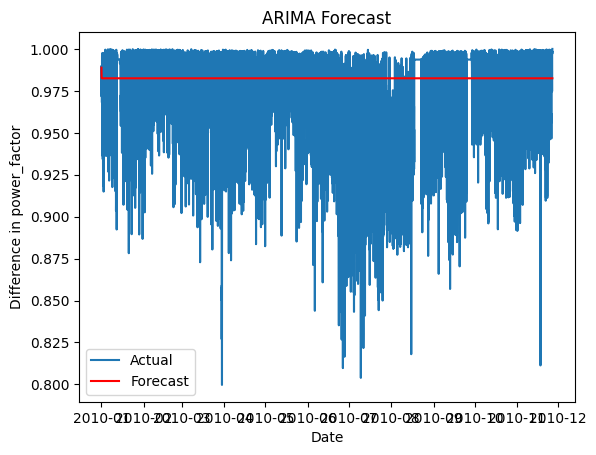

In [20]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['power_factor'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_squared_error(test['power_factor'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['power_factor'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in power_factor')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

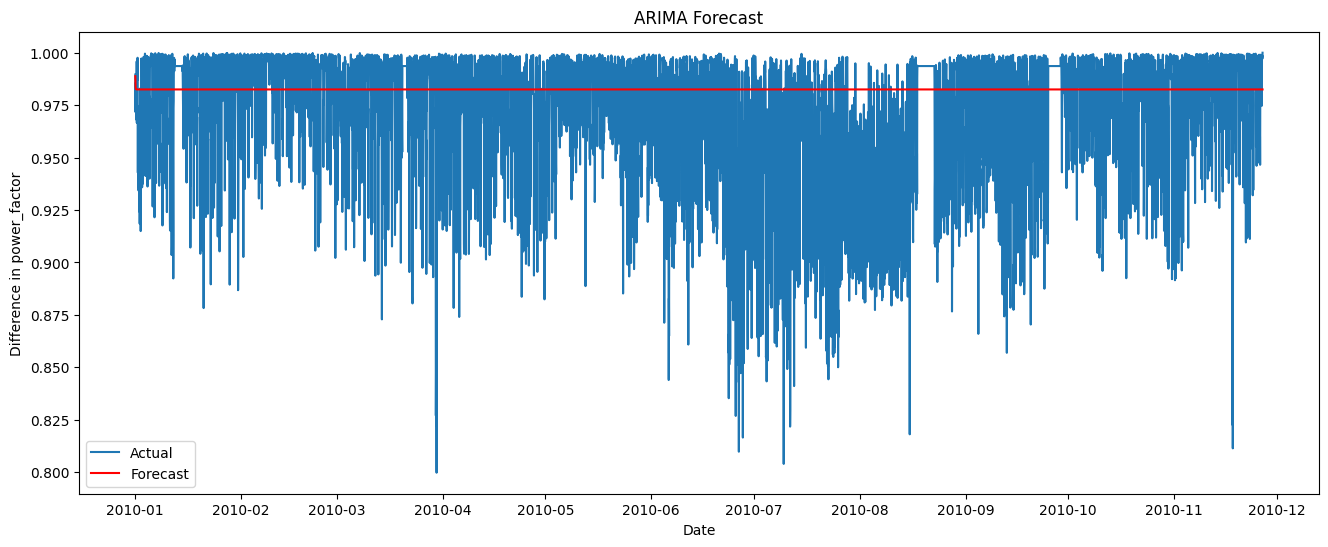

In [21]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(test.index, test['power_factor'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in power_factor')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

#### ***Of course, this is not a result to be taken seriously.***

Test MAE: 0.031
Test MAPE: 100.072


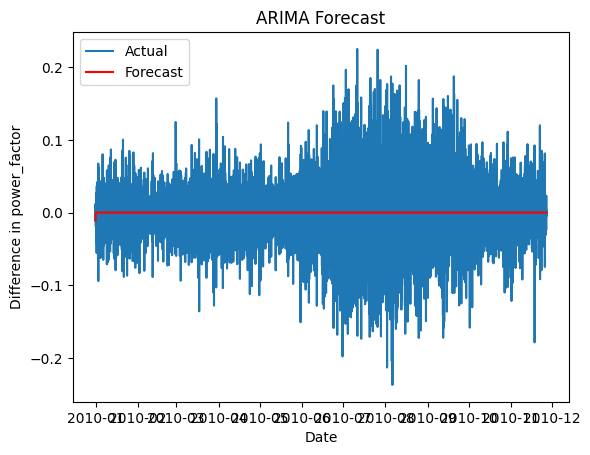

In [24]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['power_factor_deseasonalized'], order=(1,0,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_absolute_error(test['power_factor_deseasonalized'], arima_pred)
p_error = np.mean(np.abs((test['power_factor_deseasonalized'] - arima_pred) / test['power_factor_deseasonalized'])) * 100

print('Test MAE: %.3f' % error)
print('Test MAPE: %.3f' % p_error)

# Plot the results
plt.plot(test.index, test['power_factor_deseasonalized'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in power_factor')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [25]:
arima_pred[:10]

2010-01-01 00:00:00   -0.011235
2010-01-01 01:00:00   -0.003638
2010-01-01 02:00:00   -0.001181
2010-01-01 03:00:00   -0.000385
2010-01-01 04:00:00   -0.000128
2010-01-01 05:00:00   -0.000045
2010-01-01 06:00:00   -0.000018
2010-01-01 07:00:00   -0.000009
2010-01-01 08:00:00   -0.000006
2010-01-01 09:00:00   -0.000006
Freq: h, Name: predicted_mean, dtype: float64

In [26]:
compare_df = pd.concat([
    test["power_factor_deseasonalized"], 
    arima_pred], axis=1)
error_p = (np.abs(test["power_factor_deseasonalized"])- np.abs(arima_pred))/np.abs(test["power_factor_deseasonalized"])*100
compare_df.columns = ["actual", "pred"]
compare_df["error_%"] = error_p
compare_df.head(10)

actual      pred    error_%
2010-01-01 00:00:00 -0.017810 -0.011235  36.919460
2010-01-01 01:00:00 -0.011808 -0.003638  69.187105
2010-01-01 02:00:00  0.012361 -0.001181  90.447853
2010-01-01 03:00:00 -0.005995 -0.000385  93.569974
2010-01-01 04:00:00 -0.011741 -0.000128  98.908173
2010-01-01 05:00:00  0.011308 -0.000045  99.602648
2010-01-01 06:00:00  0.000620 -0.000018  97.099473
2010-01-01 07:00:00  0.004813 -0.000009  99.807130
2010-01-01 08:00:00 -0.016831 -0.000006  99.961608
2010-01-01 09:00:00  0.014022 -0.000006  99.960423

In [27]:
 compare_df.to_csv("arima_prediction_results.csv",index=True)

In [28]:
#train-test split in daily data

train, test = df_daily[df_daily.index < '2010-01-01'], df_daily[df_daily.index >= '2010-01-01']
display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (1112, 8)'

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2006-12-16  236.243763         13.082828        0.000000        1.378788   
2006-12-17  240.087028          9.999028        1.411806        2.907639   
2006-12-18  241.231694          6.421667        0.738194        1.820139   
2006-12-19  241.999313          4.926389        0.582639        5.279167   
2006-12-20  242.308062          6.467361        0.000000        1.838889   

            sub_metering_3  power_factor  power_factor_detrended  \
dt                                                                 
2006-12-16       12.439394      0.998768                0.000000   
2006-12-17        9.264583      0.988401               -0.010367   
2006-12-18        9.734722      0.976834               -0.011568   
2006-12-19        4.303472      0.973061               -0.003773   
2006-12-20        9.765972      0.978983                0.005922   

            power_factor_deseasonalized  
dt                                       
2006-12-16                          0.0  
2006-12-17                          0.0  
2006-12-18                          0.0  
2006-12-19                          0.0  
2006-12-20                          0.0

'Test shape: (330, 8)'

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2010-01-01  242.565722          3.537083        1.600000        0.227083   
2010-01-02  244.674514          3.814325        0.557029        0.207846   
2010-01-03  243.744528          6.044167        2.668056        3.416667   
2010-01-04  245.699118          4.599444        0.000000        0.202778   
2010-01-05  244.521035          6.347083        1.239583        0.203472   

            sub_metering_3  power_factor  power_factor_detrended  \
dt                                                                 
2010-01-01        2.470833      0.976637               -0.005780   
2010-01-02        4.465596      0.962314               -0.014323   
2010-01-03        6.995833      0.980319                0.018005   
2010-01-04        7.508333      0.979383               -0.000936   
2010-01-05       11.436111      0.987479                0.008096   

            power_factor_deseasonalized  
dt                                       
2010-01-01                    -0.005575  
2010-01-02                    -0.013142  
2010-01-03                     0.021778  
2010-01-04                    -0.008604  
2010-01-05                     0.012874

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 0.016361095916095716
Test MAPE: 1.72%


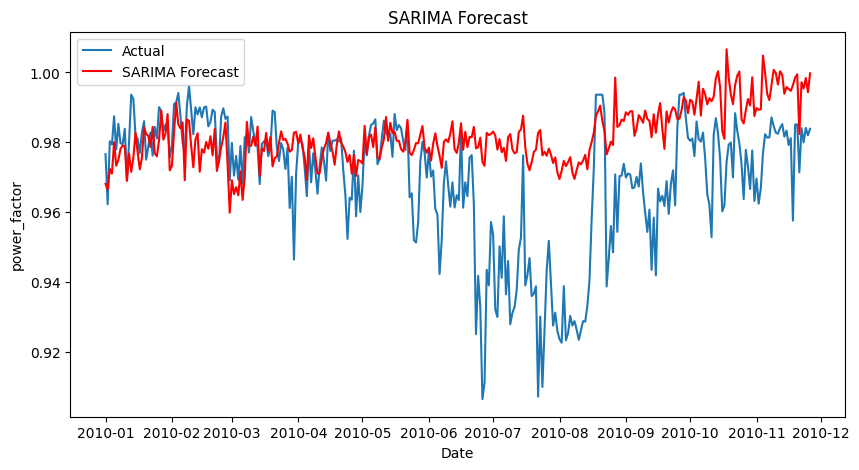

In [29]:
# SARIMAX for daily data

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q), non-seasonal order is stated for daily seasonality
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S) , S is the seasonal period, seasonal order is for weekly seasonality

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['power_factor'], exog=train[['global_intensity', 'sub_metering_1']],
                       order=order, seasonal_order=seasonal_order) # exog is for exogenous variables for better prediction
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['global_intensity', 'sub_metering_1']])

# Calculate error
mae = mean_absolute_error(test['power_factor'], sarima_pred)
mape = np.mean(np.abs((test['power_factor'] -
                          sarima_pred) / test['power_factor'])) * 100
print('Test MAE:', mae)
print('Test MAPE: %.2f%%' % mape)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['power_factor'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('power_factor')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [30]:
compare_df_sarima = pd.concat([
    test["power_factor"], 
    sarima_pred], axis=1)
sarima_error_p = (np.abs(test["power_factor"])- np.abs(sarima_pred))/np.abs(test["power_factor"])*100
compare_df_sarima.columns = ["actual", "pred"]
compare_df_sarima["error_%"] = sarima_error_p
compare_df_sarima.head(10)

actual      pred   error_%
2010-01-01  0.976637  0.968136  0.870441
2010-01-02  0.962314  0.966480 -0.432925
2010-01-03  0.980319  0.972409  0.806951
2010-01-04  0.979383  0.971056  0.850250
2010-01-05  0.987479  0.980067  0.750582
2010-01-06  0.977991  0.973359  0.473679
2010-01-07  0.985284  0.975013  1.042377
2010-01-08  0.979753  0.978158  0.162740
2010-01-09  0.979505  0.979074  0.044080
2010-01-10  0.983898  0.978889  0.509126

In [31]:
compare_df_sarima.to_csv("sarima_prediction_results.csv",index=True)

In [111]:
train, test = df_hourly[df_hourly.index < '2010-01-01 00:00:00'], df_hourly[df_hourly.index >= '2010-01-01 00:00:00']

display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (26671, 8)'

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2006-12-16 17:00:00  234.643889         18.100000             0.0   
2006-12-16 18:00:00  234.580167         15.600000             0.0   
2006-12-16 19:00:00  233.232500         14.503333             0.0   
2006-12-16 20:00:00  234.071500         13.916667             0.0   
2006-12-16 21:00:00  237.158667         13.046667             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2006-12-16 17:00:00        0.527778       16.861111      0.997052   
2006-12-16 18:00:00        6.716667       16.866667      0.999518   
2006-12-16 19:00:00        1.433333       16.683333      0.999526   
2006-12-16 20:00:00        0.000000       16.783333      0.999569   
2006-12-16 21:00:00        0.416667       17.216667      0.999422   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2006-12-16 17:00:00                0.000000                          0.0  
2006-12-16 18:00:00                0.002466                          0.0  
2006-12-16 19:00:00                0.000008                          0.0  
2006-12-16 20:00:00                0.000043                          0.0  
2006-12-16 21:00:00               -0.000147                          0.0

'Test shape: (7918, 8)'

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2010-01-01 00:00:00  241.300000          4.476667             0.0   
2010-01-01 01:00:00  241.620667          2.723333             0.0   
2010-01-01 02:00:00  244.012333          2.653333             0.0   
2010-01-01 03:00:00  244.063833          2.706667             0.0   
2010-01-01 04:00:00  241.649333          2.686667             0.0   

                     sub_metering_2  sub_metering_3  power_factor  \
dt                                                                  
2010-01-01 00:00:00            0.00        8.516667      0.989619   
2010-01-01 01:00:00            0.80        0.650000      0.971732   
2010-01-01 02:00:00            0.00        0.666667      0.981504   
2010-01-01 03:00:00            0.00        1.383333      0.985577   
2010-01-01 04:00:00            0.75        0.666667      0.973772   

                     power_factor_detrended  power_factor_deseasonalized  
dt                                                                        
2010-01-01 00:00:00               -0.007338                    -0.017810  
2010-01-01 01:00:00               -0.017887                    -0.011808  
2010-01-01 02:00:00                0.009772                     0.012361  
2010-01-01 03:00:00                0.004073                    -0.005995  
2010-01-01 04:00:00               -0.011805                    -0.011741

In [35]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
df_monthly = df.resample ('ME').mean()
train, test = df_monthly[df_monthly.index < '2010-01'], df_monthly[df_monthly.index >= '2010-01']

display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (37, 6)'

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2006-12-31  241.441016          8.029338        1.248613        2.214821   
2007-01-31  240.905098          6.546829        1.264230        1.775909   
2007-02-28  240.519406          5.914505        1.180214        1.602346   
2007-03-31  240.513476          5.572958        1.361338        2.346848   
2007-04-30  239.524112          3.894800        1.070716        1.001190   

            sub_metering_3  power_factor  
dt                                        
2006-12-31        7.409385      0.980056  
2007-01-31        7.383309      0.974331  
2007-02-28        6.703545      0.976610  
2007-03-31        6.504647      0.976222  
2007-04-30        4.943236      0.958359

'Test shape: (11, 6)'

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2010-01-31  243.272051          5.853242        1.285837        1.358281   
2010-02-28  242.348036          5.715686        1.221980        1.329181   
2010-03-31  241.940840          4.725481        0.836988        1.422583   
2010-04-30  241.782776          4.305200        0.884193        0.844382   
2010-05-31  240.369182          4.630870        1.077691        1.173327   

            sub_metering_3  power_factor  
dt                                        
2010-01-31        9.322007      0.981412  
2010-02-28       10.211481      0.986177  
2010-03-31        7.559213      0.976265  
2010-04-30        7.780034      0.972786  
2010-05-31        8.168267      0.976730

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-167.870, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-157.186, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-173.133, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-170.581, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=104.239, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-165.852, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-170.973, Time=0.15 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-169.352, Time=0.73 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-174.828, Time=0.27 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-169.866, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : A

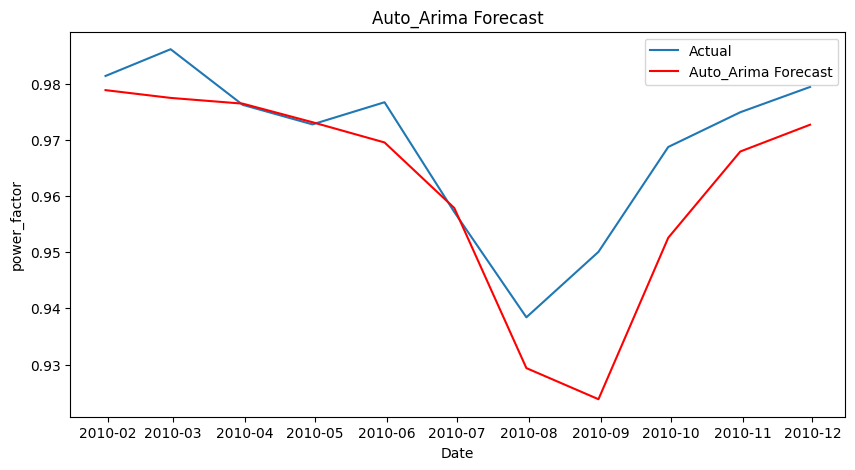

In [41]:
# Auto ARIMA for gridsearch
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = pm.auto_arima(train['power_factor'],
                      seasonal=True,
                      m=12,  # seasonality period
                      max_p=7,
                      max_d=1,
                      max_q=3,
                      max_P=3,
                      max_D=1,
                      max_Q=2,
                      stepwise=True,
                      trace=True,  # To print the progress of the fitting
                      error_action='ignore',  # Ignore potential errors
                      uppress_warnings=True,  # Suppress warnings
                      n_jobs=-1)  # Use all available CPU cores

print(model.summary())

#Make predictions
n_periods = len(test)
auto_arima_pred = model.predict(n_periods=n_periods)

# Calculate error
mae = mean_absolute_error(test['power_factor'], auto_arima_pred)
mape = np.mean(np.abs((test['power_factor'] -
                          auto_arima_pred) / test['power_factor'])) * 100
print('Test MAE:', mae)
print('Test MAPE: %.2f%%' % mape)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['power_factor'], label='Actual')
plt.plot(test.index, auto_arima_pred, color='red', label='Auto_Arima Forecast')
plt.xlabel('Date')
plt.ylabel('power_factor')
plt.title('Auto_Arima Forecast')
plt.legend()
plt.show()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   37
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                  90.414
Date:                  Thu, 27 Feb 2025   AIC                           -174.828
Time:                          19:07:33   BIC                           -169.995
Sample:                      12-31-2006   HQIC                          -173.124
                           - 12-31-2009                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3071      0.182      1.689      0.091      -0.049       0.664
ar.S.L12       0.6810      0.190      3.592      0.000       0.309       1.053
sigma2         0.0004    6.4e-05      5.639      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               171.72
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -2.74
Prob(H) (two-sided):                  1.00   Kurtosis:                        12.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
print("Mevsimsel olmayan parametreleri (p, d, q):", model.order)
print("Mevsimsel parametreleri (P, D, Q, m):", model.seasonal_order)

Mevsimsel olmayan parametreleri (p, d, q): (0, 0, 0)
Mevsimsel parametreleri (P, D, Q, m): (1, 0, 0, 12)


In [44]:
compare_df_auto_arima = pd.concat([
    test["power_factor"], 
    auto_arima_pred], axis=1)
autoarima_error_p = (np.abs(test["power_factor"])- np.abs(sarima_pred))/np.abs(test["power_factor"])*100
compare_df_auto_arima.columns = ["actual", "pred"]
compare_df_auto_arima["error_%"] = autoarima_error_p
compare_df_auto_arima.head(10)

actual      pred   error_%
2010-01-31  0.981412  0.978887  0.958715
2010-02-28  0.986177  0.977502  2.665857
2010-03-31  0.976265  0.976480 -0.687787
2010-04-30  0.972786  0.973170 -0.190512
2010-05-31  0.976730  0.969564 -0.030766
2010-06-30  0.957170  0.957883 -2.638387
2010-07-31  0.938410  0.929360 -3.517225
2010-08-31  0.950073  0.923815 -3.791912
2010-09-30  0.968758  0.952580 -2.025771
2010-10-31  0.974951  0.967953 -1.289817

In [45]:
compare_df_auto_arima.to_csv("auto_arima_prediction_results.csv",index=True)

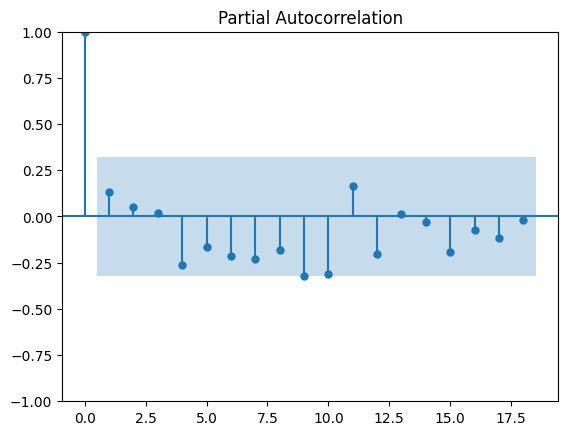

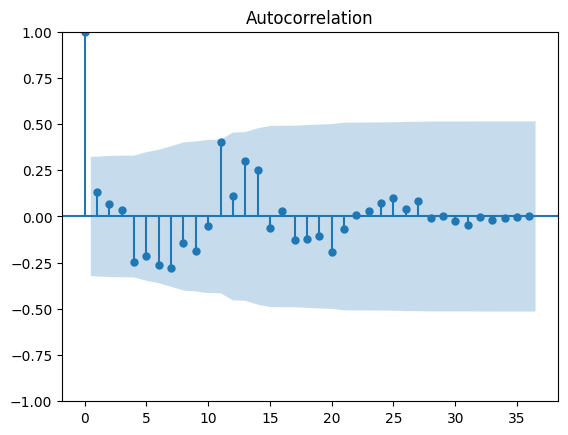

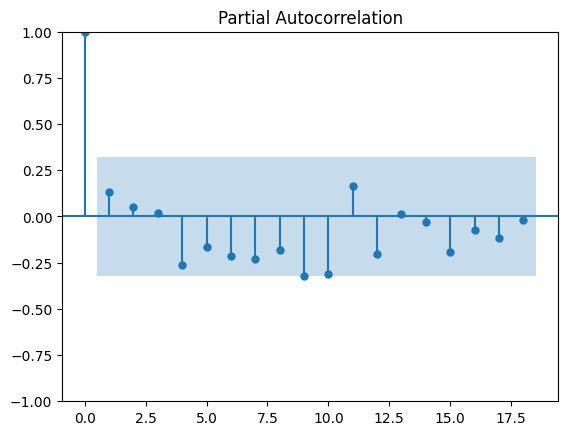

In [86]:
#In a good model, the residuals should look like white noise (random).

import statsmodels.api as sm
residuals = np.array(model.resid())

max_acf_lags = min(len(residuals) - 1, 40)  # Safe lag value for ACF
max_pacf_lags = min(len(residuals) // 2, 40)  # Safe lag value for PACF

sm.graphics.tsa.plot_acf(residuals, lags=max_acf_lags)
sm.graphics.tsa.plot_pacf(residuals, lags=max_pacf_lags)

This expression means that a good model produces residuals (the differences between the observed values and the predicted values) that represent random noise (white noise), i.e., the model has captured all the patterns in the data and there are no remaining systematic patterns in the residuals.<br>

Explanation:<br>
Model Residuals: Residuals are the differences between the observed values and the predicted values of the model. Mathematically, this is expressed as:<br>


Residual = Actual Value − Predicted Value<br>

***White Noise:*** White noise is a random process where there is no correlation between successive observations. It typically has a mean of zero and a constant variance.<br>

In other words, white noise:<br>

* Is random: There is no relationship between previous observations and the current observation.<br>
* Has zero mean and constant variance.<br>
* Has no autocorrelation: The previous values in a time series do not have predictive power for the future values.<br>
***What Does "Good Model" Mean?*** <br>
A "good" time series model means that it has accurately explained the data and the residuals should behave like random white noise. In this case, the model:<br>

- Has correctly captured the patterns in the data.<br>
- The errors are purely random, with no further structure.<br>
  ***Residuals Acting Like White Noise:*** <br>
  If the residuals of a model behave like white noise:<br>

- The model is adequate: The model has learned the relationships in the data correctly, and there are only random errors left.<br>
***If the residuals do not behave like white noise, the model:***
- May not have captured meaningful patterns in the data.
- Might need improvement (such as selecting a different model or tuning hyperparameters).
Additionally, to check if the residuals behave like white noise, methods like autocorrelation (ACF and PACF plots) are used. These plots help in assessing whether the model has made accurate predictions or not.

### ***5.2.2.Prophet Model***

Prophet is an open-source library for univariate (one variable) time series forecasting developed by Facebook. It works best with time series that have strong seasonal effects and several seasons of historical data

Official Documentation: [here](https://facebook.github.io/prophet/docs/quick_start.html)

Helpful Resources:

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet/notebook

Prophet algorithm works with the "ds" and "y" variables as inputs. We will adjust our training and test sets accordingly.<br>

***ds:*** This column contains the dates. In Prophet, the dates in this column are typically in daily frequency, although this is not mandatory. The dates can be in the format YYYY-MM-DD (e.g., "2021-01-01") or in timestamp format.<br>

***y:*** This column contains the observed values you want to predict. For example, if you want to forecast the daily number of visitors to a website, the "y" column will contain these visitor numbers.<br>

***yhat:*** This is the main value predicted by the model. In other words, it is the value that your model predicts the time series will be for a specific "ds" (date) value.<br>

***yhat_lower and yhat_upper:*** These values represent the uncertainty interval of the predictions. Prophet takes into account uncertainty when making predictions, estimating with high confidence that the true value will fall within this range. For example, if yhat_lower is 50 and yhat_upper is 60, it means that the model confidently predicts that the true value will be within this range.

In [46]:
df.head()

voltage  global_intensity  sub_metering_1  \
dt                                                               
2006-12-16 17:24:00   234.84              18.4             0.0   
2006-12-16 17:25:00   233.63              23.0             0.0   
2006-12-16 17:26:00   233.29              23.0             0.0   
2006-12-16 17:27:00   233.74              23.0             0.0   
2006-12-16 17:28:00   235.68              15.8             0.0   

                     sub_metering_2  sub_metering_3  power_factor  
dt                                                                 
2006-12-16 17:24:00             1.0            17.0      0.995121  
2006-12-16 17:25:00             1.0            16.0      0.996708  
2006-12-16 17:26:00             2.0            17.0      0.995734  
2006-12-16 17:27:00             1.0            17.0      0.995688  
2006-12-16 17:28:00             1.0            17.0      0.989787

In [88]:
df_daily = df.resample('D').mean()

In [89]:
df_daily.shape

(1442, 6)

In [47]:
df_daily.head()

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2006-12-16  236.243763         13.082828        0.000000        1.378788   
2006-12-17  240.087028          9.999028        1.411806        2.907639   
2006-12-18  241.231694          6.421667        0.738194        1.820139   
2006-12-19  241.999313          4.926389        0.582639        5.279167   
2006-12-20  242.308062          6.467361        0.000000        1.838889   

            sub_metering_3  power_factor  power_factor_detrended  \
dt                                                                 
2006-12-16       12.439394      0.998768                0.000000   
2006-12-17        9.264583      0.988401               -0.010367   
2006-12-18        9.734722      0.976834               -0.011568   
2006-12-19        4.303472      0.973061               -0.003773   
2006-12-20        9.765972      0.978983                0.005922   

            power_factor_deseasonalized  
dt                                       
2006-12-16                          0.0  
2006-12-17                          0.0  
2006-12-18                          0.0  
2006-12-19                          0.0  
2006-12-20                          0.0

In [48]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Due to the power_factor values, the result in the MAPE calculation is NaN. To prevent this, I wanted to use the WMAPE metric,
# so I calculated the metric in a way that zero or very close to zero values ​​would not cause problems.
import numpy as np

def wmape(y_true, y_pred):
    """
    Calculates the Weighted Mean Absolute Percentage Error (WMAPE).

    Args:
        y_true: The actual values.
        y_pred: The predicted values.

    Returns:
        The WMAPE as a percentage.
    """

    # Ensure input arrays are NumPy arrays for element-wise operations
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Calculate absolute errors
    absolute_errors = np.abs(y_true - y_pred)

    # Calculate weighted absolute percentage errors
    weighted_absolute_percentage_errors = (absolute_errors / y_true)

    # Handle zero values in y_true to avoid division by zero
    weighted_absolute_percentage_errors = np.nan_to_num(weighted_absolute_percentage_errors, nan=0.0, posinf=0.0, neginf=0.0)

    # Calculate the WMAPE
    wmape = np.sum(absolute_errors) / np.sum(y_true) * 100

    return wmape


19:15:27 - cmdstanpy - INFO - Chain [1] start processing
19:15:27 - cmdstanpy - INFO - Chain [1] done processing


Test MAE: 0.020
Test MAPE: 2.064%


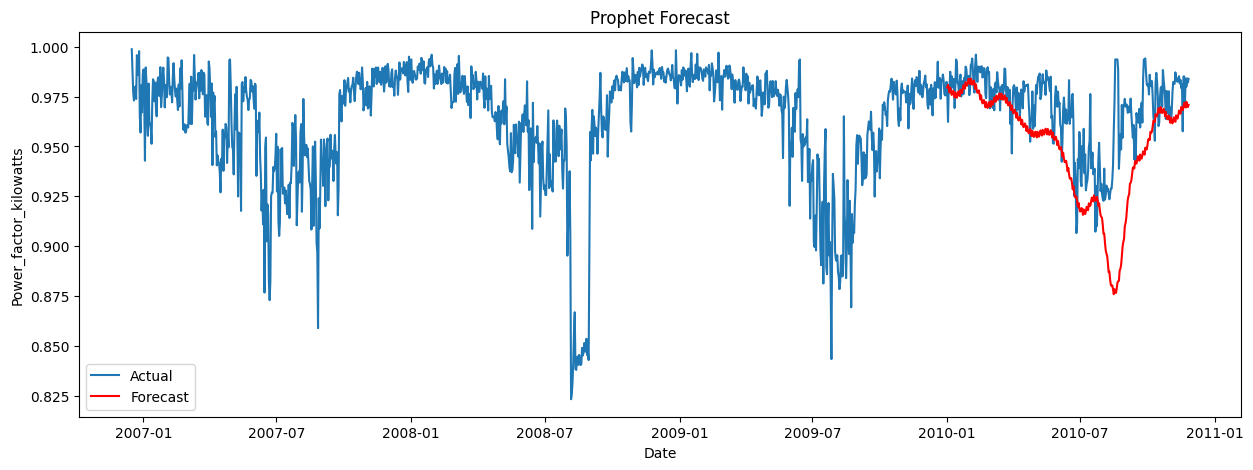

In [50]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Rename columns for Prophet
df_prophet = df_daily.reset_index().rename(columns={'dt': 'ds', 'power_factor': 'y'})

# Split the data into training and testing sets

p_train, p_test = df_prophet[df_prophet.ds < '2010-01-01'],df_prophet[df_prophet.ds >= '2010-01-01']
p_test = p_test.sort_values('ds')

# Initialize and fit the Prophet model
prop_model = Prophet(seasonality_mode="multiplicative",changepoint_prior_scale=0.01)

prop_model.fit(p_train)

# Make future dataframe
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]
predicted = predicted.sort_index()


# Calculate error
mae = mean_absolute_error(p_test['y'], predicted['yhat'])
mape = wmape(p_test['y'], predicted['yhat'])
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_factor_kilowatts')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [60]:
df_hourly = df.resample('H').mean()

In [61]:
df_hourly.shape

(34589, 6)

In [62]:
df_hourly.head(1)

voltage  global_intensity  sub_metering_1  \
dt                                                                  
2006-12-16 17:00:00  234.643889              18.1             0.0   

                     sub_metering_2  sub_metering_3  power_factor  
dt                                                                 
2006-12-16 17:00:00        0.527778       16.861111      0.997052

19:20:20 - cmdstanpy - INFO - Chain [1] start processing
19:20:45 - cmdstanpy - INFO - Chain [1] done processing


Test MSE: 0.001
Test MAPE: 2.821%


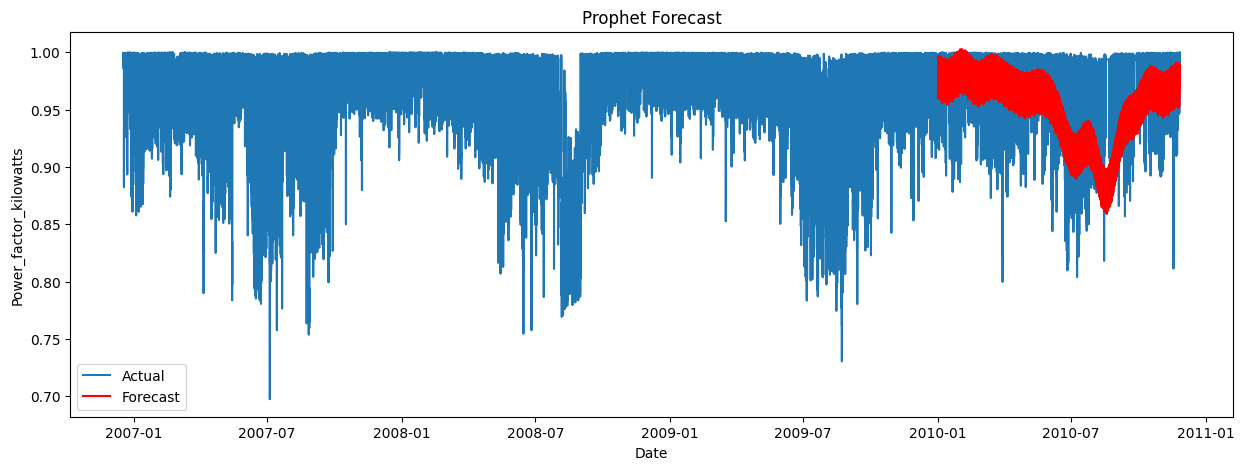

In [63]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df_hourly.reset_index().rename(columns={'dt': 'ds', 'power_factor': 'y'})

# Split the data into training and testing sets

p_train, p_test = df_prophet[df_prophet.ds < '2010-01-01 00:00:00'], df_prophet[df_prophet.ds >= '2010-01-01 00:00:00']


# Initialize and fit the Prophet model with additional features
prop_model = Prophet()

prop_model.fit(p_train)

# Make future dataframe
future = prop_model.make_future_dataframe(periods=len(p_test), freq='H')

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]
predicted = predicted.sort_index()


# Calculate error
mse = mean_squared_error(p_test['y'], predicted['yhat'])
mape = wmape(p_test['y'], predicted['yhat'])

print('Test MSE: %.3f' % mse)
print('Test MAPE: %.3f%%' % mape)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_factor_kilowatts')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [64]:
p_test.head(3)

ds     voltage  global_intensity  sub_metering_1  \
26671 2010-01-01 00:00:00  241.300000          4.476667             0.0   
26672 2010-01-01 01:00:00  241.620667          2.723333             0.0   
26673 2010-01-01 02:00:00  244.012333          2.653333             0.0   

       sub_metering_2  sub_metering_3         y  
26671             0.0        8.516667  0.989619  
26672             0.8        0.650000  0.971732  
26673             0.0        0.666667  0.981504

#### ***zoom in on estimated time range: This Prophet forecast chart shows the actual and forecast values ​​of the time series in the test period (year 2010)***

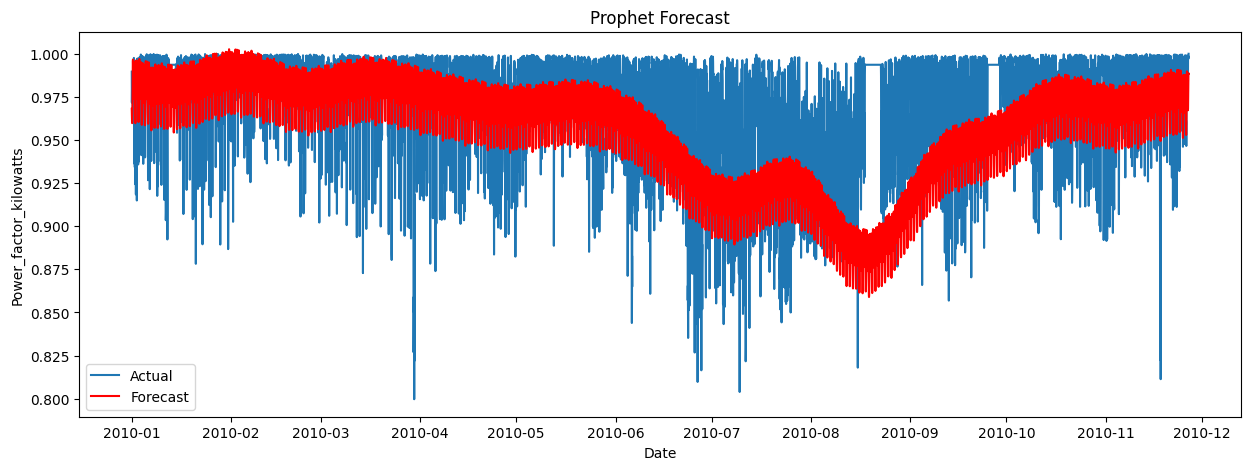

In [65]:
forecast2 = prop_model.predict(p_test)
forecasting = forecast2[['ds', 'yhat']].set_index('ds').loc[p_test['ds']].sort_index()
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(forecasting.index, forecasting['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_factor_kilowatts')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

- Blue lines (Actual): Shows the actual power factor values.<br>
- Red area (Forecast): Prophet model's forecast values and forecast uncertainty range.<br>
- X-axis: Time (hourly data throughout 2010).<br>
- Y-axis: Power factor (Power Factor Kilowatts).<br><br>

1- Seasonal Trend Captured:<br>

- Prophet model predicted that power factor decreases in spring-summer
(June-August) and increases from autumn.<br>
- This shows that the time series has a significant seasonality.<br>
- A similar decrease is observed in the real data, meaning Prophet was able to capture this trend.<br><br>
2- Uncertainty Range Width:<br><br>
- The uncertainty range of the forecast (red area) is especially wide in summer months.<br>
- This shows that the model expects more variance during these periods and the confidence interval increases.<br><br>
  Possible reasons:<br><br>
- Sudden fluctuations in power factor during summer months.<br>
- Uncertainty or missing data in the training data.<br>
- External factors not included in the model (e.g. changes in temperature or electricity demand).<br><br>
3- Model Smoothes Extreme Dips and Spikes:<br><br>
- Prophet often fails to capture extreme values because it learns about trends and seasonality.<br>
- Prophet model was unable to predict some of the sudden drops seen in real data, instead it followed an average trend.<br>
- This means that Prophet does not model extreme values well (for example, it cannot predict events such as large power grid spikes or outages).<br><br>
4- Winter and Spring Forecasts Are Better Matched:<br><br>
- Prophet forecasts for January-March and September-December are much closer to the actual data.<br>
- Prophet seems to forecast better during periods when seasonality is more regular.

In [54]:
df_daily.head(1)

voltage  global_intensity  sub_metering_1  sub_metering_2  \
dt                                                                         
2006-12-16  236.243763         13.082828             0.0        1.378788   

            sub_metering_3  power_factor  power_factor_detrended  \
dt                                                                 
2006-12-16       12.439394      0.998768                     0.0   

            power_factor_deseasonalized  
dt                                       
2006-12-16                          0.0

19:21:24 - cmdstanpy - INFO - Chain [1] start processing
19:21:25 - cmdstanpy - INFO - Chain [1] done processing


Test MAE: 0.019
Test MAPE: 1.983%


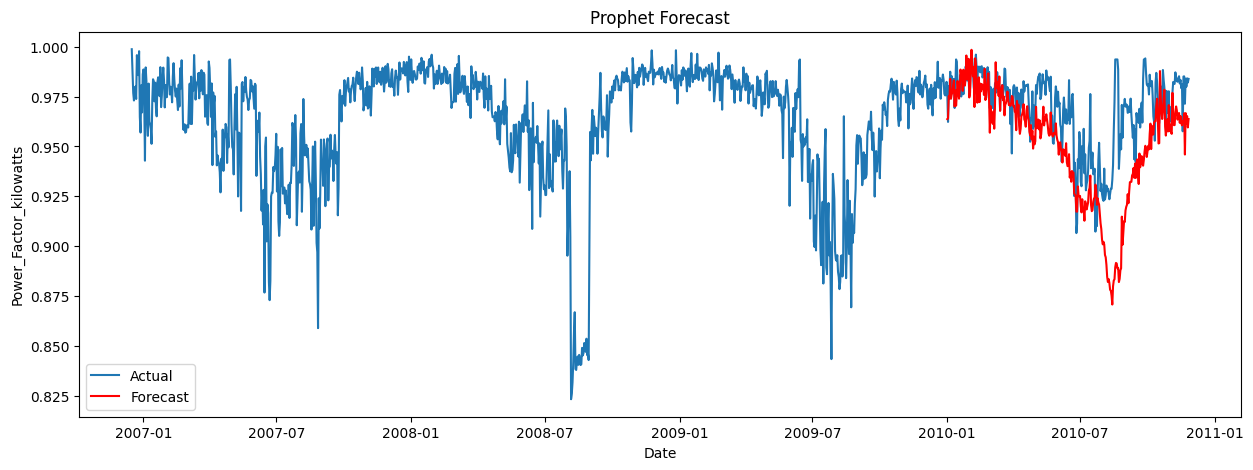

In [66]:
from prophet import Prophet

df_prophet = df_daily.reset_index().rename(columns={'dt': 'ds', 'power_factor': 'y'})

# Add additional features
df_prophet['global_intensity'] = df_daily['global_intensity'].values
df_prophet['sub_metering_1'] = df_daily['sub_metering_1'].values

# Split the data into training and testing sets

p_train, p_test = df_prophet[df_prophet.ds < '2010-01-01'], df_prophet[df_prophet.ds >= '2010-01-01']
p_test = p_test.sort_values('ds')

# Initialize and fit the Prophet model with additional features
prop_model = Prophet()
prop_model.add_regressor('global_intensity')
prop_model.add_regressor('sub_metering_1')

prop_model.fit(p_train)


# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['global_intensity'] = df_daily['global_intensity'].values
future['sub_metering_1'] = df_daily['sub_metering_1'].values

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]
predicted = predicted.sort_index()

# Calculate error
mae = mean_absolute_error(p_test['y'], predicted['yhat'])
mape = wmape(p_test['y'], predicted['yhat'])

print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)


# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_Factor_kilowatts')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

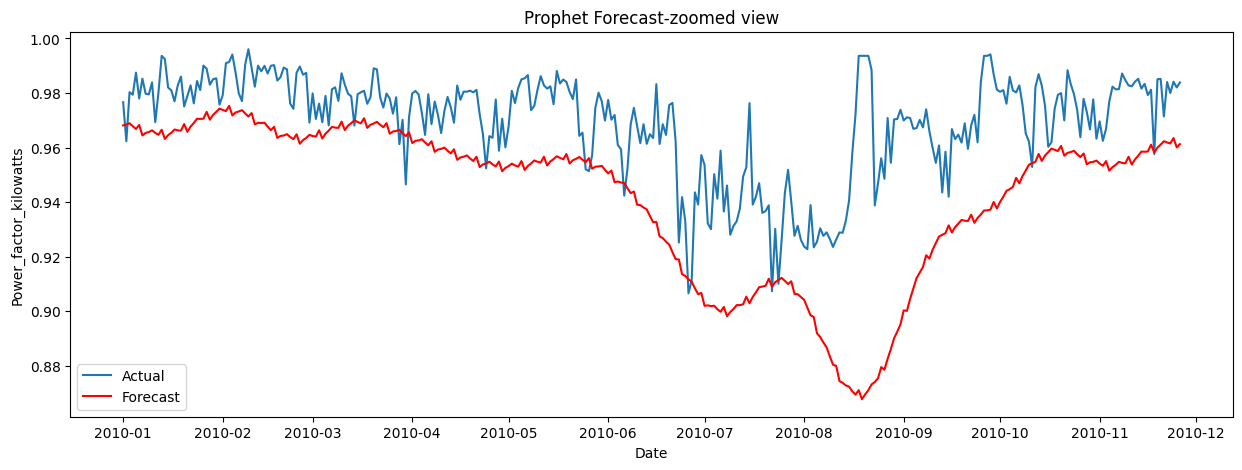

In [67]:
forecast_daily = prop_model.predict(p_test)
forecasting_daily = forecast2[['ds', 'yhat']].set_index('ds').loc[p_test['ds']].sort_index()
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(forecasting_daily.index, forecasting_daily['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_factor_kilowatts')
plt.title('Prophet Forecast-zoomed view')
plt.legend()
plt.show()

 #### ***Adding features did not contribute to the model***

#### ***Cross validation to capture the best parameters for Prophet***

In [69]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics # Importing necessary functions
import itertools

df_prop = df_daily.reset_index().rename(columns={'dt': 'ds', 'power_factor': 'y'})

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

best_score = float('inf')
best_params = None

for params in all_params:
    model = Prophet(**params).fit(df_prop)
    df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=0.1)
    if df_p['rmse'].values[0] < best_score:
        best_score = df_p['rmse'].values[0]
        best_params = params

print("best parameters:", best_params)

19:23:45 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:45 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing
19:23:45 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing
19:23:45 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing
19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing
19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing
19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing
19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing
19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing
19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing
19:23:48 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1] done processing
19:23:48 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1] done processing
19:23:48 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1] done processing
19:23:48 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing
19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:53 - cmdstanpy - INFO - Chain [1] done processing
19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:53 - cmdstanpy - INFO - Chain [1] done processing
19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:53 - cmdstanpy - INFO - Chain [1] done processing
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:54 - cmdstanpy - INFO - Chain [1] done processing
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:54 - cmdstanpy - INFO - Chain [1] done processing
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:54 - cmdstanpy - INFO - Chain [1] done processing
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:55 - cmdstanpy - INFO - Chain [1] start processing
19:23:55 - cmdstanpy - INFO - Chain [1] done processing
19:23:55 - cmdstanpy - INFO - Chain [1] start processing
19:23:55 - cmdstanpy - INFO - Chain [1] done processing
19:23:55 - cmdstanpy - INFO - Chain [1] start processing
19:23:56 - cmdstanpy - INFO - Chain [1] done processing
19:23:56 - cmdstanpy - INFO - Chain [1] start processing
19:23:57 - cmdstanpy - INFO - Chain [1] done processing
19:23:57 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:59 - cmdstanpy - INFO - Chain [1] done processing
19:23:59 - cmdstanpy - INFO - Chain [1] start processing
19:24:00 - cmdstanpy - INFO - Chain [1] done processing
19:24:00 - cmdstanpy - INFO - Chain [1] start processing
19:24:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:01 - cmdstanpy - INFO - Chain [1] done processing
19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:01 - cmdstanpy - INFO - Chain [1] done processing
19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:02 - cmdstanpy - INFO - Chain [1] done processing
19:24:02 - cmdstanpy - INFO - Chain [1] start processing
19:24:03 - cmdstanpy - INFO - Chain [1] done processing
19:24:03 - cmdstanpy - INFO - Chain [1] start processing
19:24:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:04 - cmdstanpy - INFO - Chain [1] start processing
19:24:04 - cmdstanpy - INFO - Chain [1] done processing
19:24:04 - cmdstanpy - INFO - Chain [1] start processing
19:24:04 - cmdstanpy - INFO - Chain [1] done processing
19:24:04 - cmdstanpy - INFO - Chain [1] start processing
19:24:05 - cmdstanpy - INFO - Chain [1] done processing
19:24:05 - cmdstanpy - INFO - Chain [1] start processing
19:24:05 - cmdstanpy - INFO - Chain [1] done processing
19:24:06 - cmdstanpy - INFO - Chain [1] start processing
19:24:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:07 - cmdstanpy - INFO - Chain [1] done processing
19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:07 - cmdstanpy - INFO - Chain [1] done processing
19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:08 - cmdstanpy - INFO - Chain [1] done processing
19:24:09 - cmdstanpy - INFO - Chain [1] start processing
19:24:09 - cmdstanpy - INFO - Chain [1] done processing
19:24:10 - cmdstanpy - INFO - Chain [1] start processing
19:24:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:10 - cmdstanpy - INFO - Chain [1] start processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] start processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] start processing
19:24:12 - cmdstanpy - INFO - Chain [1] done processing
19:24:12 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing
19:24:13 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:14 - cmdstanpy - INFO - Chain [1] start processing
19:24:14 - cmdstanpy - INFO - Chain [1] done processing
19:24:14 - cmdstanpy - INFO - Chain [1] start processing
19:24:14 - cmdstanpy - INFO - Chain [1] done processing
19:24:15 - cmdstanpy - INFO - Chain [1] start processing
19:24:16 - cmdstanpy - INFO - Chain [1] done processing
19:24:16 - cmdstanpy - INFO - Chain [1] start processing
19:24:16 - cmdstanpy - INFO - Chain [1] done processing
19:24:17 - cmdstanpy - INFO - Chain [1] start processing
19:24:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:24:17 - cmdstanpy - INFO - Chain [1] start processing
19:24:18 - cmdstanpy - INFO - Chain [1] done processing
19:24:18 - cmdstanpy - INFO - Chain [1] start processing
19:24:18 - cmdstanpy - INFO - Chain [1] done processing
19:24:19 - cmdstanpy - INFO - Chain [1] start processing
19:24:20 - cmdstanpy - INFO - Chain [1] done processing
19:24:20 - cmdstanpy - INFO - Chain [1] start processing
19:24:20 - cmdstanpy - INFO - Chain [1] done processing


best parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}


In [70]:
print("best parameters:", best_params)

best parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}


20:01:36 - cmdstanpy - INFO - Chain [1] start processing
20:01:37 - cmdstanpy - INFO - Chain [1] done processing


Test MAE: 0.015
Test MAPE: 1.539%


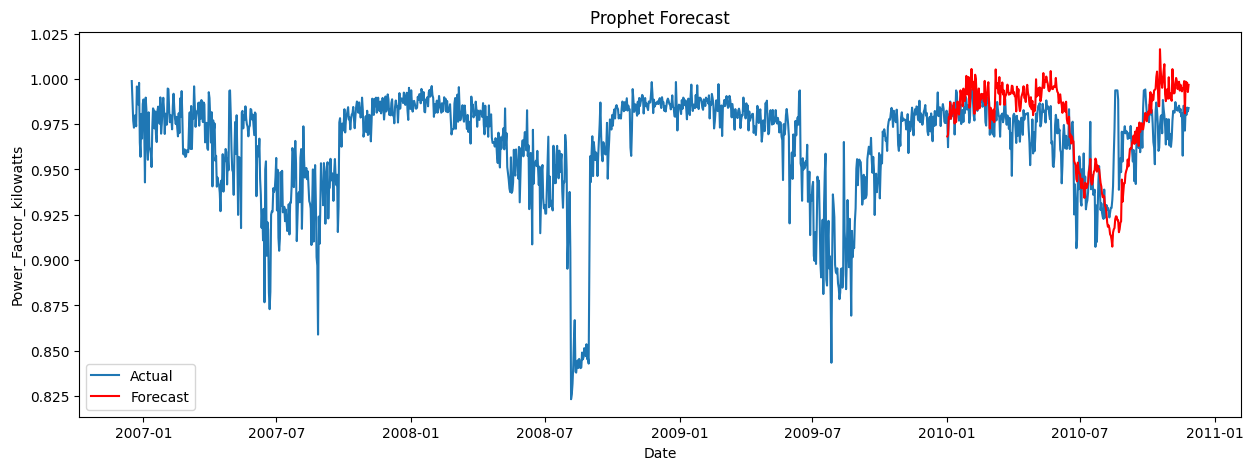

In [103]:
from prophet import Prophet

df_prophet = df_daily.reset_index().rename(columns={'dt': 'ds', 'power_factor': 'y'})

# Add additional features
df_prophet['global_intensity'] = df_daily['global_intensity'].values
df_prophet['sub_metering_1'] = df_daily['sub_metering_1'].values

# Split the data into training and testing sets

p_train, p_test = df_prophet[df_prophet.ds < '2010-01-01'], df_prophet[df_prophet.ds >= '2010-01-01']
p_test = p_test.sort_values('ds')

# Initialize and fit the Prophet model with additional features
prop_model = Prophet(changepoint_prior_scale = 0.5, seasonality_prior_scale= 0.01)
prop_model.add_regressor('global_intensity')
prop_model.add_regressor('sub_metering_1')

prop_model.fit(p_train)


# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['global_intensity'] = df_daily['global_intensity'].values
future['sub_metering_1'] = df_daily['sub_metering_1'].values

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]
predicted = predicted.sort_index()

# Calculate error
mae = mean_absolute_error(p_test['y'], predicted['yhat'])
mape = wmape(p_test['y'], predicted['yhat'])

print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)


# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Power_Factor_kilowatts')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [73]:
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2006-12-16  0.953651    0.992334    1.027077     0.953651     0.953651   
1 2006-12-17  0.953680    0.972365    1.005448     0.953680     0.953680   
2 2006-12-18  0.953708    0.953847    0.988546     0.953708     0.953708   
3 2006-12-19  0.953737    0.946738    0.979484     0.953737     0.953737   
4 2006-12-20  0.953765    0.955896    0.988617     0.953765     0.953765   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0        0.056642              0.056642              0.056642   
1        0.035118              0.035118              0.035118   
2        0.017635              0.017635              0.017635   
3        0.009401              0.009401              0.009401   
4        0.018692              0.018692              0.018692   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                   0.053690                         0.053690   
1                   0.032146                         0.032146   
2                   0.011488                         0.011488   
3                   0.002617                         0.002617   
4                   0.013152                         0.013152   

   extra_regressors_additive_upper  global_intensity  global_intensity_lower  \
0                         0.053690          0.051515                0.051515   
1                         0.032146          0.032618                0.032618   
2                         0.011488          0.010697                0.010697   
3                         0.002617          0.001535                0.001535   
4                         0.013152          0.010977                0.010977   

   global_intensity_upper  sub_metering_1  sub_metering_1_lower  \
0                0.051515        0.002174              0.002174   
1                0.032618       -0.000473             -0.000473   
2                0.010697        0.000790              0.000790   
3                0.001535        0.001082              0.001082   
4                0.010977        0.002174              0.002174   

   sub_metering_1_upper    weekly  weekly_lower  weekly_upper    yearly  \
0              0.002174 -0.002033     -0.002033     -0.002033  0.004985   
1             -0.000473 -0.002155     -0.002155     -0.002155  0.005127   
2              0.000790  0.000866      0.000866      0.000866  0.005281   
3              0.001082  0.001343      0.001343      0.001343  0.005441   
4              0.002174 -0.000062     -0.000062     -0.000062  0.005602   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      0.004985      0.004985                   0.0   
1      0.005127      0.005127                   0.0   
2      0.005281      0.005281                   0.0   
3      0.005441      0.005441                   0.0   
4      0.005602      0.005602                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0  1.010294  
1                         0.0                         0.0  0.988797  
2                         0.0                         0.0  0.971343  
3                         0.0                         0.0  0.963137  
4                         0.0                         0.0  0.972458

In [74]:
forecast['Actual_pf'] = df_prophet['y']

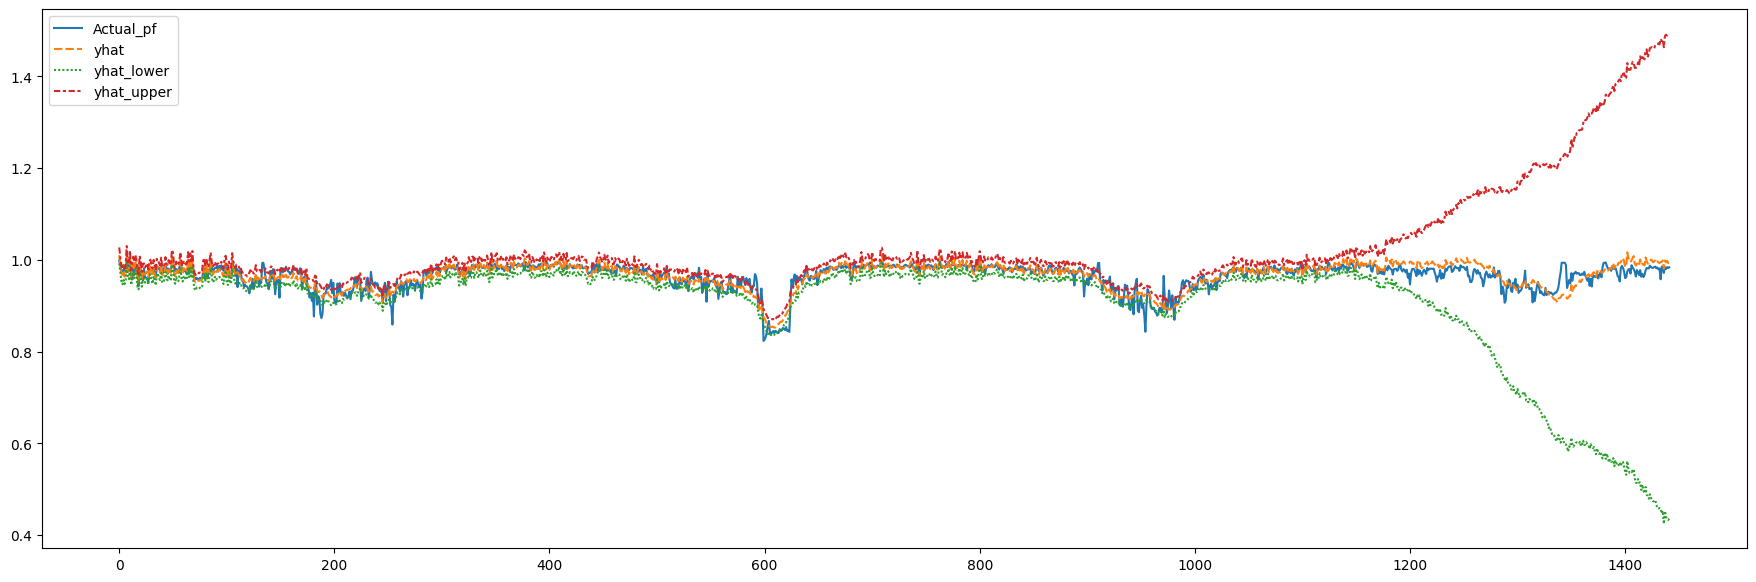

In [75]:
plt.figure(figsize=(22,7))
sns.lineplot(data = forecast[['Actual_pf', 'yhat', 'yhat_lower','yhat_upper']]);

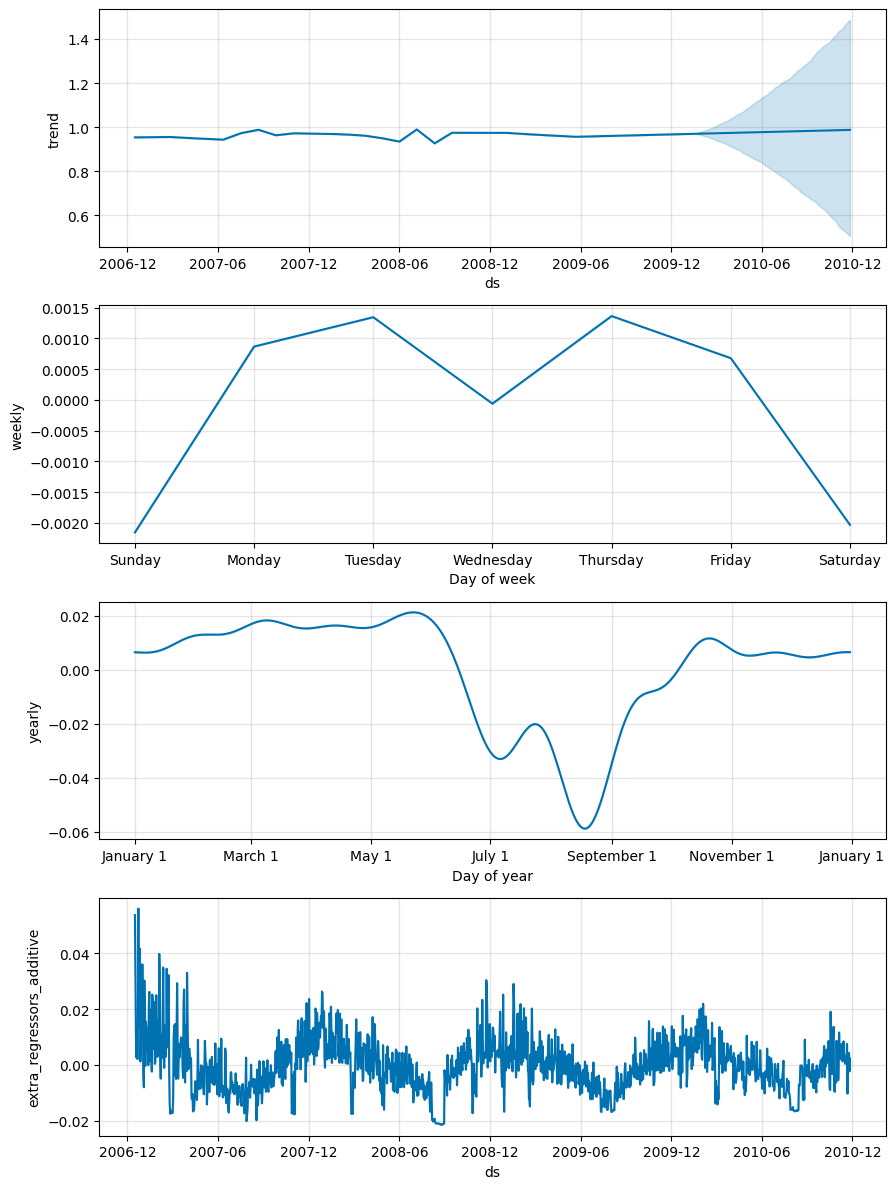

In [109]:
fig = prop_model.plot_components(forecast)

In [104]:
predicted.head()

yhat
ds                  
2010-01-01  0.968214
2010-01-02  0.969182
2010-01-03  0.978786
2010-01-04  0.977981
2010-01-05  0.986872

In [105]:
p_test = p_test.set_index("ds")

In [106]:
p_test.head()

voltage  global_intensity  sub_metering_1  sub_metering_2  \
ds                                                                         
2010-01-01  242.565722          3.537083        1.600000        0.227083   
2010-01-02  244.674514          3.814325        0.557029        0.207846   
2010-01-03  243.744528          6.044167        2.668056        3.416667   
2010-01-04  245.699118          4.599444        0.000000        0.202778   
2010-01-05  244.521035          6.347083        1.239583        0.203472   

            sub_metering_3         y  power_factor_detrended  \
ds                                                             
2010-01-01        2.470833  0.976637               -0.005780   
2010-01-02        4.465596  0.962314               -0.014323   
2010-01-03        6.995833  0.980319                0.018005   
2010-01-04        7.508333  0.979383               -0.000936   
2010-01-05       11.436111  0.987479                0.008096   

            power_factor_deseasonalized  
ds                                       
2010-01-01                    -0.005575  
2010-01-02                    -0.013142  
2010-01-03                     0.021778  
2010-01-04                    -0.008604  
2010-01-05                     0.012874

In [107]:
compare_df_prophet = pd.concat([
    p_test["y"], 
    predicted["yhat"]], axis=1)
prophet_error_p = (np.abs(p_test["y"])- np.abs(predicted["yhat"]))/np.abs(p_test["y"])*100
compare_df_prophet.columns = ["actual", "pred"]
compare_df_prophet["error_%"] = prophet_error_p
compare_df_prophet.head(10)

actual      pred   error_%
ds                                      
2010-01-01  0.976637  0.968214  0.862422
2010-01-02  0.962314  0.969182 -0.713748
2010-01-03  0.980319  0.978786  0.156396
2010-01-04  0.979383  0.977981  0.143197
2010-01-05  0.987479  0.986872  0.061455
2010-01-06  0.977991  0.978011 -0.002028
2010-01-07  0.985284  0.979927  0.543651
2010-01-08  0.979753  0.981383 -0.166422
2010-01-09  0.979505  0.984852 -0.545797
2010-01-10  0.983898  0.986864 -0.301452

In [108]:
compare_df_prophet.to_csv("prophet_prediction_results.csv",index=True)

### ***5.2.3.XGBoost***

XGBoost is short for Extreme Gradient Boosting and is an efficient implementation of the stochastic gradient boosting machine learning algorithm

The stochastic gradient boosting algorithm, also called gradient boosting machines or tree boosting, is a powerful machine learning technique that performs well or even best on a wide range of challenging machine learning problems

To be able to use XGBoost for time series forecasting, the data should be transformed into supervised learning before feeding it into the model

Official Documentation: here

Helpful Resources:

https://machinelearningmastery.com/xgboost-for-time-series-forecasting/ https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost

In [109]:
df_hourly[df_hourly.index.year == 2010].index.min(),df_hourly[df_hourly.index.year == 2010].index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-11-26 21:00:00'))

In [147]:
df_train, df_test = df_hourly[df_hourly.index < '2010-01-01 00:00:00'], df_hourly[df_hourly.index >= '2010-01-01 00:00:00']

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 26671
Test:	 7918


In [148]:
def date_transform(data):
    df = data.copy()

    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year

    X = df.drop('power_factor', axis=1)
    y = df['power_factor']

    return X, y

In [149]:
X_train, y_train = date_transform(df_train)
X_test, y_test = date_transform(df_test)

In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [150]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000,
                         eval_metric=['mae','rmse','mape'],
                         learning_rate=0.05,
                         early_stopping_rounds=10)

xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_model.predict(X_test)

[0]	validation_0-mae:0.03118	validation_0-rmse:0.04115	validation_0-mape:0.03348	validation_1-mae:0.02645	validation_1-rmse:0.03144	validation_1-mape:0.02761
[1]	validation_0-mae:0.03002	validation_0-rmse:0.03965	validation_0-mape:0.03224	validation_1-mae:0.02543	validation_1-rmse:0.03022	validation_1-mape:0.02654
[2]	validation_0-mae:0.02889	validation_0-rmse:0.03822	validation_0-mape:0.03102	validation_1-mae:0.02438	validation_1-rmse:0.02898	validation_1-mape:0.02545
[3]	validation_0-mae:0.02781	validation_0-rmse:0.03687	validation_0-mape:0.02987	validation_1-mae:0.02344	validation_1-rmse:0.02785	validation_1-mape:0.02445
[4]	validation_0-mae:0.02680	validation_0-rmse:0.03559	validation_0-mape:0.02879	validation_1-mae:0.02255	validation_1-rmse:0.02682	validation_1-mape:0.02353
[5]	validation_0-mae:0.02584	validation_0-rmse:0.03438	validation_0-mape:0.02776	validation_1-mae:0.02167	validation_1-rmse:0.02582	validation_1-mape:0.02260
[6]	validation_0-mae:0.02493	validation_0-rmse:0.033

In [151]:
eval_results = xgb_model.evals_result()

# MAE ve RMSE değerlerini yazdır
train_mae = eval_results['validation_0']['mae'][-1]  # MAE in the last iteration
test_mae = eval_results['validation_1']['mae'][-1]

train_rmse = eval_results['validation_0']['rmse'][-1]  # RMSE in the last iteration
test_rmse = eval_results['validation_1']['rmse'][-1]

train_mape = eval_results['validation_0']['mape'][-1]*100  # MAPE in the last iteration
test_mape = eval_results['validation_1']['mape'][-1]*100

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: % {train_mape:.4f}")
print(f"Test MAPE: % {test_mape:.4f}")

Train MAE: 0.0105
Test MAE: 0.0125
Train RMSE: 0.0165
Test RMSE: 0.0186
Train MAPE: % 1.1273
Test MAPE: % 1.3130


In [117]:
type(xgb_pred)

numpy.ndarray

In [116]:
xgb_pred[:10]

array([0.98140675, 0.9538372 , 0.9789601 , 0.9783878 , 0.9560736 ,
       0.9784849 , 0.97572845, 0.9751216 , 0.9606995 , 0.97613233],
      dtype=float32)

In [117]:
y_test[:10]

dt
2010-01-01 00:00:00    0.989619
2010-01-01 01:00:00    0.971732
2010-01-01 02:00:00    0.981504
2010-01-01 03:00:00    0.985577
2010-01-01 04:00:00    0.973772
2010-01-01 05:00:00    0.982072
2010-01-01 06:00:00    0.989798
2010-01-01 07:00:00    0.985212
2010-01-01 08:00:00    0.968061
2010-01-01 09:00:00    0.989297
Freq: h, Name: power_factor, dtype: float64

In [119]:
error = y_test - xgb_pred
error_perc = (error/y_test)*100

df_compare_xgb = pd.DataFrame({
        "real_value": y_test.values,
        "predicted_value": xgb_pred,
        "error": error,
        "percentage" : error_perc
}, index=y_test.index)

df_compare_xgb.sample(10)

real_value  predicted_value     error  percentage
dt                                                                    
2010-09-24 06:00:00    0.931862         0.925834  0.006028    0.646902
2010-05-29 03:00:00    0.931241         0.942589 -0.011349   -1.218671
2010-02-06 09:00:00    0.995440         0.992268  0.003172    0.318672
2010-01-26 10:00:00    0.995135         0.992856  0.002279    0.229022
2010-04-17 06:00:00    0.974493         0.972513  0.001980    0.203162
2010-01-31 04:00:00    0.944938         0.967511 -0.022574   -2.388896
2010-06-27 02:00:00    0.939908         0.945474 -0.005566   -0.592156
2010-06-16 07:00:00    0.962058         0.953766  0.008291    0.861836
2010-05-19 04:00:00    0.974993         0.956017  0.018976    1.946268
2010-05-10 17:00:00    0.976991         0.964259  0.012733    1.303260

In [120]:
df_compare_xgb.to_csv("xgb_prediction_results.csv",index=True)

#### ***XgBoost with daily data***

In [152]:
df_train, df_test = df_daily[df_daily.index < '2010-01-01'], df_daily[df_daily.index >= '2010-01-01']

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 1112
Test:	 330


In [153]:
def date_transformed(data):
    df = data.copy()

    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year

    X = df.drop('power_factor', axis=1)
    y = df['power_factor']

    return X, y

In [154]:
X_train, y_train = date_transformed(df_train)
X_test, y_test = date_transformed(df_test)

In [155]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000,
                         eval_metric=['mae','rmse','mape'],
                         learning_rate=0.05,
                         early_stopping_rounds=10)

xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_model.predict(X_test)

[0]	validation_0-mae:0.02192	validation_0-rmse:0.02955	validation_0-mape:0.02333	validation_1-mae:0.01637	validation_1-rmse:0.01902	validation_1-mape:0.01694
[1]	validation_0-mae:0.02101	validation_0-rmse:0.02833	validation_0-mape:0.02237	validation_1-mae:0.01568	validation_1-rmse:0.01817	validation_1-mape:0.01622
[2]	validation_0-mae:0.02017	validation_0-rmse:0.02717	validation_0-mape:0.02146	validation_1-mae:0.01502	validation_1-rmse:0.01737	validation_1-mape:0.01553
[3]	validation_0-mae:0.01934	validation_0-rmse:0.02608	validation_0-mape:0.02058	validation_1-mae:0.01442	validation_1-rmse:0.01667	validation_1-mape:0.01491
[4]	validation_0-mae:0.01856	validation_0-rmse:0.02503	validation_0-mape:0.01975	validation_1-mae:0.01387	validation_1-rmse:0.01602	validation_1-mape:0.01433
[5]	validation_0-mae:0.01783	validation_0-rmse:0.02405	validation_0-mape:0.01897	validation_1-mae:0.01334	validation_1-rmse:0.01544	validation_1-mape:0.01378
[6]	validation_0-mae:0.01711	validation_0-rmse:0.023

In [156]:
eval_results = xgb_model.evals_result()

# MAE ve RMSE değerlerini yazdır
train_mae = eval_results['validation_0']['mae'][-1]  # MAE in the last iteration
test_mae = eval_results['validation_1']['mae'][-1]

train_rmse = eval_results['validation_0']['rmse'][-1]  # RMSE in the last iteration
test_rmse = eval_results['validation_1']['rmse'][-1]

train_mape = eval_results['validation_0']['mape'][-1]*100  # MAPE in the last iteration
test_mape = eval_results['validation_1']['mape'][-1]*100

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: % {train_mape:.4f}")
print(f"Test MAPE: % {test_mape:.4f}")

Train MAE: 0.0073
Test MAE: 0.0099
Train RMSE: 0.0098
Test RMSE: 0.0126
Train MAPE: % 0.7750
Test MAPE: % 1.0222


In [126]:
error = y_test - xgb_pred
error_perc = (error/y_test)*100

df_compare_xgb = pd.DataFrame({
        "real_value": y_test.values,
        "predicted_value": xgb_pred,
        "error": error,
        "percentage" : error_perc
}, index=y_test.index)

df_compare_xgb.sample(10)

real_value  predicted_value     error  percentage
dt                                                           
2010-01-22    0.982808         0.978409  0.004399    0.447585
2010-10-28    0.973067         0.966535  0.006531    0.671190
2010-01-28    0.983070         0.975062  0.008008    0.814542
2010-02-21    0.988678         0.980185  0.008493    0.859030
2010-02-12    0.990036         0.978898  0.011138    1.125025
2010-03-29    0.970172         0.976209 -0.006037   -0.622297
2010-03-03    0.976115         0.964946  0.011168    1.144178
2010-02-19    0.985835         0.978864  0.006971    0.707103
2010-06-14    0.964894         0.965776 -0.000883   -0.091472
2010-10-09    0.965106         0.968537 -0.003432   -0.355588

In [127]:
df_compare_xgb.to_csv("xgb_daily_pred_results.csv",index=True)

In [158]:
import os


file_names = [
    "arima_prediction_results.csv",
    "sarima_prediction_results.csv",
    "auto_arima_prediction_results.csv",
    "prophet_prediction_results.csv"   
    ]


dfs = []


for file in file_names:
    model_name = file.split("_prediction_results.csv")[0]
    df = pd.read_csv(file, usecols=["error_%"]) 
    new_columns = {col: f"{model_name}/{col}" for col in df.columns}  
    df.rename(columns=new_columns, inplace=True)  
    dfs.append(df)  


df_compare_all_models = pd.concat(dfs, axis=1)
df_compare_all_models["xgb_error_%"] = pd.read_csv("xgb_daily_pred_results.csv")["percentage"]


df_compare_all_models.head(10)


arima/error_%  sarima/error_%  auto_arima/error_%  prophet/error_%  \
0      36.919460        0.870441            0.958715         0.862422   
1      69.187105       -0.432925            2.665857        -0.713748   
2      90.447853        0.806951           -0.687787         0.156396   
3      93.569974        0.850250           -0.190512         0.143197   
4      98.908173        0.750582           -0.030766         0.061455   
5      99.602648        0.473679           -2.638387        -0.002028   
6      97.099473        1.042377           -3.517225         0.543651   
7      99.807130        0.162740           -3.791912        -0.166422   
8      99.961608        0.044080           -2.025771        -0.545797   
9      99.960423        0.509126           -1.289817        -0.301452   

   xgb_error_%  
0     0.318493  
1    -1.019247  
2     0.388411  
3     0.193820  
4     0.834630  
5     0.309031  
6     0.679661  
7     0.462942  
8     0.115095  
9     0.434722

In [159]:
df_compare_all_models.mean()

arima/error_%         99.708973
sarima/error_%        -1.373724
auto_arima/error_%    -1.054760
prophet/error_%       -0.796400
xgb_error_%            0.679632
dtype: float64

# ***Conclusion:*** 

According to the results so far, the Xgboost model is the best model to predict our future data, but based on extensive results review, Prophet may be preferred.